<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/S4E5_EDA_v1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with an Flood Dataset
Playground Series - Season 4, Episode 5


####**Dataset Description**
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Abalone dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Files
**train.csv** - the training dataset; Rings is the integer target
**test.csv** - the test dataset; your objective is to predict the value of Rings for each row
**sample_submission.csv** - a sample submission file in the correct format

In [1]:
%%capture
run_n = 0
if run_n==0:
  #!pip install tensorflow-addons
  #!pip install shap
  #!pip install eli5
  #!pip install tf-nightly
  #!pip install -U scikit-learn==1.2.0
  !pip install catboost
  #!pip install haversine
  #!pip install pytorch-forecasting
  #!pip install umap-learn
  #!pip install reverse_geocoder
  #!pip install --upgrade protobuf
  !pip install colorama
  #!pip install imbalanced-learn
  !pip install optuna
  !pip install optuna-integration
  #!pip install pygam
  !pip install keras-tuner --upgrade
  #!pip install pycaret
  #!pip install lightning==2.0.1
  !pip install keras-nlp
  #!pip install MiniSom
  !pip install category_encoders
  !pip install BorutaShap
  !pip install feature-engine
  #!pip install scikit-learn==1.4.1
  !pip install scikit-lego

In [2]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

from IPython.display import display_html, clear_output;
clear_output();

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
from copy import deepcopy
import re
#from scipy import stats
from random import randint
from prettytable import PrettyTable
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
#from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display
#from umap import UMAP

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
#import imblearn
import scipy.stats as stats
from scipy.special import boxcox, boxcox1p


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer, KNNImputer

#from category_encoders import MEstimateEncoder, CatBoostEncoder, OrdinalEncoder

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
from catboost import CatBoost, CatBoostRegressor
from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
#from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import feature_engine as fe
from feature_engine.creation import MathFeatures

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
#import tensorflow_addons as tfa
from keras.utils import FeatureSpace
#import keras_nlp
from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
# Feature selection
from BorutaShap import BorutaShap
%matplotlib inline
SEED = 1984
N_SPLITS = 10

# Personal Library

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Done, All the required modules are imported. Time elapsed: 12.356922149658203 sec


<Figure size 640x480 with 0 Axes>

In [3]:
%%time

# Setting rc parameters in seaborn for plots and graphs-
# Reference - https://matplotlib.org/stable/tutorials/introductory/customizing.html:-
# To alter this, refer to matplotlib.rcParams.keys()

sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.75,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : '#0099e6',
         'axes.titlesize'       : 8.5,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

# Color printing
def PrintColor(text:str, color = Fore.BLUE, style = Style.BRIGHT):
    "Prints color outputs using colorama using a text F-string";
    print(style + color + text + Style.RESET_ALL);

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

print();
gc.collect();


CPU times: user 299 ms, sys: 2.5 ms, total: 301 ms
Wall time: 296 ms


159

<Figure size 800x550 with 0 Axes>

In [4]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
#print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.13.1
mpl: 3.7.1
tensorflow: 2.16.1
pandas: 2.2.2
numpy: 1.25.2
scikit-learn: 1.5.0
statsmodels: 0.14.2
missingno: 0.5.2
XGBoost: 2.0.3


In [5]:
print(f"scikit-learn: {sk.__version__}")

scikit-learn: 1.5.0


In [6]:
# Configuration class:-
class CFG:
    """
    Configuration class for parameters and CV strategy for tuning and training
    Some parameters may be unused here as this is a general configuration class
    """;

    # Data preparation:-
    version_nb         = 4;
    test_req           = "N";
    test_sample_frac   = 0.025;
    gpu_switch         = "OFF";
    state              = 42;
    target             = ["Rings"];
    episode            = 5;
    season             = 4;
    path               = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S{season}E{episode}_Flood";
    orig_path          = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S{season}E{episode}_Plates/flood.csv";
    public_subs_path   = None;

    dtl_preproc_req    = "Y";
    adv_cv_req         = "N";
    ftre_plots_req     = 'Y';
    ftre_imp_req       = "Y";

    # Data transforms and scaling:-
    conjoin_orig_data  = "Y";
    drop_nulls         = "N";
    sec_ftre_req       = "Y";
    scale_req          = "N";
    # NOTE---Keep a value here even if scale_req = N, this is used for linear models:-
    scl_method         = "Z";
    enc_method         = 'Label';
    OH_cols            = ["MTRANS"];
    tgt_mapper         = {0 : 0,
                          1 : 1,
                          };

    # Model Training:-
    baseline_req       = "N";
    pstprcs_oof        = "N";
    pstprcs_train      = "N";
    pstprcs_test       = "N";
    ML                 = "Y";

    pseudo_lbl_req     = "N";
    pseudolbl_up       = 0.975;
    pseudolbl_low      = 0.00;

    use_orig_allfolds  = "N";
    n_splits           = 3 if test_req == "Y" else 10;
    n_repeats          = 1 ;
    nbrnd_erly_stp     = 75;
    mdlcv_mthd         = 'RSKF';

    # Ensemble:-
    ensemble_req       = "Y";
    hill_climb_req     = "N";
    optuna_req         = "Y";
    LAD_req            = "N";
    enscv_mthd         = "RSKF";
    metric_obj         = 'maximize';
    ntrials            = 10 if test_req == "Y" else 150;

    # Global variables for plotting:-
    grid_specs = {'visible': True, 'which': 'both', 'linestyle': '--',
                           'color': 'lightgrey', 'linewidth': 0.75};
    title_specs = {'fontsize': 9, 'fontweight': 'bold', 'color': 'tab:blue'};

#print();
PrintColor(f"--> Configuration done!\n");
gc.collect();

CFG.ntrials

--> Configuration done!



150

### 0.0 Connect Drives:

In [7]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


Connect to Google Drive:

In [8]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
folder_script = models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Scripts/S4E5_Flood"
os.chdir(folder_script)
import data_analysis as da

da.info_on_functions()

run_graph=1

This tool provides the following functionalities:

 1. connect_drives():
Reconnect to Google Drives

 2. load_data() and read_data()[Class method]:
Upload the relevant datasets
Inputs:
- train_dataset='train.csv',
- test_dataset='test.csv',
- old_dataset=None,
- exp_name='S4E1_BankChurn', 
- is_csv=True,
- index_col=0,
- to_drop=[],
- submission='sample_submission.csv',
- base='C:/Users/Fabrizio/Documents/Jupyter Notebook/Kaggle'
The class also gives access to the following functions:
 a - check_nana() to verify the presence of NaN,
 b - summary(self,on='train',cmap='Reds'): Provides basic info on the Dataframe
 c - adversarial_validation(self,kind='train_test',missing_values=np.nan,strategy_num='median',strategy_obj='most_frequent',drop_features=['Exited']): test the possibility to merge old and new train set
 d -  merge_trail_old(self): it merges old and new train set
 e - reduce_mem_usage(self, verbose=True): it changes datatypes to reduce the size of the dataset
 f - check_duplicat

<Figure size 800x550 with 0 Axes>

In [10]:
da.seed_everything(seed=42, tensorflow_init=True,pytorch_init=False)

#### Control Action

In [11]:
run_ridge=0
run_lgb = 0
run_xgb=0
run_cat=0

### 0.1 Functions:

In [12]:
from numpy import array, random, arange

def sort_rows(df,features_original):

    df_copy = df[features_original].copy()

    df_copy = np.sort(df_copy,axis=1)

    return df_copy

def adjust_row_means_vectorized_low(df,features_original, to_remove=2):
    df_copy = df[features_original].copy()
    df_copy["adj_mean"]=df_copy.mean(axis=1)

    means = df_copy.mean(axis=1)
    medians = df_copy.median(axis=1)

    # Remove the two highest values if mean > median
    where_high = means > medians
    df_copy.loc[where_high,"adj_mean"] = np.sort(df_copy.loc[where_high,:],axis=1)[:,:-to_remove].mean(axis=1)

    # Remove the two lowest values if mean <= median
    where_low = means < medians
    df_copy.loc[where_low,"adj_mean"] = np.sort(df_copy.loc[where_low,:],axis=1)[:,to_remove:].mean(axis=1)

    return df_copy["adj_mean"].values

def adjust_row_means_vectorized(df,features_original, to_remove=7):
    df_copy = df[features_original].copy()
    df_copy["adj_mean"]=np.sort(df_copy,axis=1)[:,:to_remove].mean(axis=1)

    return df_copy["adj_mean"].values

def xicor(X, Y, ties=True):
    random.seed(42)
    n = len(X)-1
    order = array([i[0] for i in sorted(enumerate(X), key=lambda x: x[1])])
    if ties:
        l = array([sum(y >= Y[order]) for y in Y[order]])
        r = l.copy()
        for j in range(n):
            if sum([r[j] == r[i] for i in range(n)]) > 1:
                tie_index = array([r[j] == r[i] for i in range(n)])
                r[tie_index] = random.choice(r[tie_index] - arange(0, sum([r[j] == r[i] for i in range(n)])), sum(tie_index), replace=False)
        return 1 - n*sum( abs(r[1:] - r[:n-1]) ) / (2*sum(l*(n - l)))
    else:
        r = array([sum(y >= Y[order]) for y in Y[order]])
        return 1 - 3 * sum( abs(r[1:] - r[:n-1]) ) / (n**2 - 1)

def sum_three_smallest_numpy(df,num):
    values = df.values

    smallest = 22-np.sort(values, axis=1)[:, :num].mean(axis=1)
    largest = np.sort(values, axis=1)[:, -num:].mean(axis=1)
    rt = largest-smallest
    return rt


def plot_regression_scatter(y_true, y_pred):
  plt.figure(figsize=(8, 6))
  plt.scatter(y_true, y_pred)
  plt.plot(y_true, y_true, 'r--')  # Perfect prediction line
  plt.xlabel('Target Values')
  plt.ylabel('Predicted Values')
  plt.title('Regression Output vs. Target with Reference')
  plt.show()

def create_sub_files(df_results, scaler, oof_results=[], experiment_name = "", folder_data = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/S4E5_Flood",replace_duplicates=True):

  os.chdir(folder_data)

  sub = pd.read_csv("sample_submission.csv", index_col="id")
  if replace_duplicates==True:
    replacements = pd.read_csv("test_duplicated.csv",index_col=0)


  res_no_reb = sub.copy()
  res_reb = sub.copy()

  test_results_df_no_reb = pd.DataFrame(index=sub.index, columns=sub.columns, data=df_results)
  res_no_reb = test_results_df_no_reb
  res_no_reb_sub = pd.DataFrame(index=sub.index, columns=sub.columns, data=scaler.inverse_transform(res_no_reb))

  res_with_replacement = res_no_reb_sub.copy()
  res_with_replacement.loc[replacements.index]=replacements.values

  res_no_reb_sub.to_csv(f"Results/{experiment_name}.csv")
  res_with_replacement.to_csv(f"Results/{experiment_name}_test_with_replacements.csv")

  res_no_reb.to_csv(f"results_ensemble/{experiment_name}_test.csv")
  res_with_replacement.to_csv(f"results_ensemble/{experiment_name}_test_with_replacements.csv")

  if len(oof_results)!=0:
    oof_results_df = pd.DataFrame(columns=sub.columns, data=oof_results)
    oof_results_df.to_csv(f"results_ensemble/{experiment_name}_train.csv")

  return res_no_reb_sub

def plot_training_session(history):
  # Plot training and validation loss scores
  # against the number of epochs.
  plt.figure(figsize=(8, 6))
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Validation')
  plt.grid(linestyle='--')
  plt.ylabel('val_loss')
  plt.xlabel('Epoch')
  plt.title('Train-Validation Scores', pad=13)
  plt.legend(loc='upper right');
  plt.show()

In [13]:
class add_cluster_features(BaseEstimator, TransformerMixin):

    def __init__(self, num_clusters=8, random_state=None, features=None, target="target", name="x_cluster"):

        self.clustes=num_clusters
        self.random_state = random_state
        self.features = features
        self._name = name
        self.target=target
        self.strategy = KMeans(n_clusters=self.clustes, random_state=self.random_state)

    def fit(self, X, y):
        # only numerical columns:

        temp = X.loc[:, self.features].copy()

        self.strategy.fit(temp)

        return self


    def transform(self, X):
        Xt = X.copy()

        Xt.loc[:, self._name] = self.strategy.predict(Xt.loc[:, self.features])

        return Xt

    def fit_transform(self, X, y):
        Xt = X.copy()
        self.fit(Xt, y)
        return self.transform(Xt)

    def elbow_test(self, X, y, k=(3,12),metric="distortion"):
        Xt = X[self.features].copy()
        model = KMeans()
        visualizer = KElbowVisualizer(self.strategy, k=k,metric=metric)
        visualizer.fit(Xt)        # Fit the data to the visualizer
        visualizer.show()        # Finalize and render the figure


###########################################################################
splits=3
n_repeats=3
seed=42

skf = RepeatedStratifiedKFold(n_splits = splits, n_repeats=n_repeats,
                              random_state = seed,
                              #shuffle = True
                              )

skf = KFold(
            n_splits = 5,
            random_state = seed,
            shuffle = True
            )

# Containers for results
oof, test_pred = {}, {}

def cross_validate_tuning(model, trial, features, train, test, target_feat="FloodProbability", n_repeats=1,
                          rs_list=[17,3,78,18,20,42,38,25,1978,1981], pruning=True,es=True,
                          model_type="lgbm"):

    """Compute out-of-fold and test predictions for a given model.

    Out-of-fold and test predictions are stored in the global variables
    oof and test_pred, respectively.

    If n_repeats > 1, the model is trained several times with different seeds.

    All predictions are clipped to the interval [1, 29].
    """
    scores = []
    oof_preds = np.full_like(train[target_feat], np.nan, dtype=float)

    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    for fold, (idx_tr, idx_va) in enumerate(kf.split(train, train[target_feat])):
        X_tr = train.iloc[idx_tr][features]
        X_va = train.iloc[idx_va][features]
        y_tr = train.iloc[idx_tr][target_feat]
        y_va = train.iloc[idx_va][target_feat]

        y_pred = np.zeros_like(y_va, dtype=float)
        for i in range(n_repeats):
            print(f"Running Fold {fold} - Experiment {i}")
            m = clone(model)

            try:
                m.set_params(random_state=rs_list[i])
            except:
                pass


            if 'lgbm' in model_type:
                fit_params={"eval_set":(X_va,y_va),
                            "callbacks":[]}
                if pruning==True:
                    fit_params["callbacks"].append(optuna.integration.LightGBMPruningCallback(trial, metric="l2"))
                if es==True:
                    fit_params["callbacks"].append(early_stopping(stopping_rounds=51))

                m.fit(X_tr, y_tr,**fit_params)

            elif 'xgb' in model_type:
                fit_params={"eval_set":[(X_va,y_va)],
                            "callbacks":[]}

                if pruning==True:
                    fit_params["callbacks"].append(optuna.integration.XGBoostPruningCallback(trial, "validation_0-rmse"))
                if es==True:
                    fit_params["callbacks"].append(xgb.callback.EarlyStopping(rounds=51, save_best=True))


                m.fit(X_tr, y_tr, verbose=False, **fit_params)

            elif 'cat' in model_type:
                fit_params={"eval_set":[(X_va,y_va)],"callbacks":[]}
                if pruning==True:
                  fit_params["callbacks"].append(optuna.integration.CatBoostPruningCallback(trial, "RMSE"))

                m.fit(X_tr, y_tr,**fit_params)


            else:
                m.fit(X_tr, y_tr)

            y_pred += m.predict(X_va)
        y_pred /= n_repeats

        score = mean_squared_error(y_va, y_pred)
        R2 = r2_score(y_va, y_pred)
        print(f"# Fold {fold}: MSE={score:.5f}, R2={R2:.5f}")
        scores.append(score)
        oof_preds[idx_va] = y_pred
    print(f"{Fore.GREEN}# Overall MSE Mean: {np.array(scores).mean():.5f}{Style.RESET_ALL}")
    final_score=np.array(scores).mean()

    return final_score


## 1.0 Upload Dataset:

In [14]:
dataset_manager = da.load_data.read_data(to_drop=[],base="/content/drive/MyDrive/Exercises/Studies_Structured_Data/", exp_name="S4E5_Flood", old_dataset="flood.csv")
train_df = dataset_manager.train_dataset
test_df = dataset_manager.test_dataset
old_df = dataset_manager.old

old_df = old_df.reset_index()
dataset_manager.old=old_df
old_df = dataset_manager.old

/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/S4E5_Flood already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/Models/S4E5_Flood already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data//Models/S4E5_Flood/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data//Script/S4E5_Flood/trees_models/ already exists

Current Directory:/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E5_Flood


In [15]:
train_df.head(3)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530


In [16]:
test_df.head(3)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
id,,,,,,,,,,,,,,,,,,,,
1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3


In [17]:
old_df.head(3)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6,0.515


### 1.1 Preliminary Analsys:

In [18]:
dataset_manager.summary()

data shape: (1117957, 21)


,data type,#missing,%missing,#unique,min,max,median,mean
MonsoonIntensity,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.921450
TopographyDrainage,int64,0,0.000000,19,0.000000,18.000000,5.000000,4.926671
RiverManagement,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.955322
Deforestation,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.942240
Urbanization,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.942517
ClimateChange,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.934093
DamsQuality,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.955878
Siltation,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.927791
AgriculturalPractices,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.942619
Encroachments,int64,0,0.000000,19,0.000000,18.000000,5.000000,4.949230


In [19]:
dataset_manager.summary(on="test",cmap="Reds")

data shape: (745305, 20)


,data type,#missing,%missing,#unique,min,max,median,mean
MonsoonIntensity,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.915610
TopographyDrainage,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.930288
RiverManagement,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.960027
Deforestation,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.946084
Urbanization,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.938424
ClimateChange,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.933524
DamsQuality,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.958468
Siltation,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.927651
AgriculturalPractices,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.945308
Encroachments,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.950620


In [20]:
dataset_manager.summary(on="old",cmap="Reds")

data shape: (50000, 21)


,data type,#missing,%missing,#unique,min,max,median,mean
MonsoonIntensity,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.991480
TopographyDrainage,int64,0,0.000000,18,0.000000,18.000000,5.000000,4.984100
RiverManagement,int64,0,0.000000,17,0.000000,16.000000,5.000000,5.015940
Deforestation,int64,0,0.000000,18,0.000000,17.000000,5.000000,5.008480
Urbanization,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.989060
ClimateChange,int64,0,0.000000,18,0.000000,17.000000,5.000000,4.988340
DamsQuality,int64,0,0.000000,17,0.000000,16.000000,5.000000,5.015360
Siltation,int64,0,0.000000,17,0.000000,16.000000,5.000000,4.988600
AgriculturalPractices,int64,0,0.000000,17,0.000000,16.000000,5.000000,5.006120
Encroachments,int64,0,0.000000,18,0.000000,18.000000,5.000000,5.006380


In [21]:
old_df = dataset_manager.old
old_df.sample(10)
#old_df.rename(columns={"Whole_weight":"Whole weight","Shucked_weight":"Whole weight.1","Viscera_weight":"Whole weight.2","Shell_weight":"Shell weight"},inplace=True)

#dataset_manager.old = old_df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
33553,7,3,4,4,5,6,2,5,5,4,6,6,4,6,5,4,2,5,5,3,0.455
9427,4,7,7,3,5,7,5,2,7,6,3,3,5,5,9,2,10,3,2,4,0.495
199,2,3,3,4,5,4,7,7,2,3,8,8,7,5,5,2,4,5,7,3,0.470
12447,5,4,5,7,8,2,5,5,5,8,4,6,2,3,4,5,5,2,3,4,0.460
39489,3,9,5,3,3,4,6,9,0,5,2,5,7,2,6,5,8,3,5,3,0.465
42724,4,8,3,5,5,7,9,4,6,8,7,8,4,4,5,6,5,3,2,4,0.535
10822,8,5,5,3,4,5,5,8,4,5,3,4,1,2,7,9,4,5,7,4,0.490
49498,4,5,7,2,2,1,4,4,4,9,6,4,8,3,6,6,6,7,6,2,0.480
4144,7,6,6,14,6,9,1,3,9,4,7,4,9,9,4,6,1,4,8,4,0.605
36958,10,3,6,2,3,7,0,5,4,9,5,5,3,4,7,6,3,7,2,7,0.490


### 1.2 Adversial Validation

In [22]:
train_no_nan = train_df.drop(columns="FloodProbability")
old_no_nan = old_df.drop(columns="FloodProbability")

In [23]:
gc.collect()

108

In [24]:
new_train = dataset_manager.merge_train_old()
new_train.shape

(1167957, 21)

In [25]:
dataset_manager.train = new_train
train_df = dataset_manager.train_dataset
train_df.shape

(1167957, 21)

### 1.3 NaN Review:

In [26]:
dataset_manager.check_nana()

Train Dataset:
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

Test Dataset:
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                    

### 1.4 Check for Duplicates

In [27]:
dataset_manager.define_target(["FloodProbability"])
dataset_manager.check_duplicates();

Identified Duplicates in test data: 0


## 2.0 Target Feature

In [28]:
target_groups = train_df.groupby(["FloodProbability"])[["FloodProbability"]].count().div(len(train_df))
target_groups*100

,FloodProbability
FloodProbability,
0.285,0.001798
0.315,0.003767
0.320,0.007021
0.325,0.005480
0.330,0.007278
...,...
0.700,0.002825
0.705,0.003767
0.710,0.002055


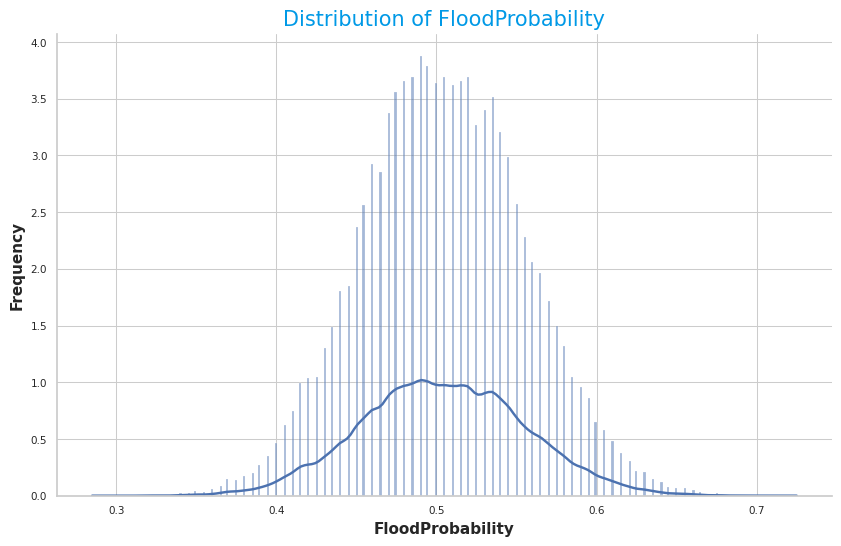

In [29]:
target_groups = train_df.copy()
plt.figure(figsize=(10, 6))
sns.histplot(data=target_groups, x='FloodProbability', kde=True,
             stat="percent"
              )
plt.title('Distribution of FloodProbability', fontsize=15)
plt.xlabel('FloodProbability')
plt.ylabel('Frequency')
plt.grid(True)
#plt.yscale('log')
plt.show()

In [30]:
train_df.FloodProbability.min(),train_df.FloodProbability.max(),

(0.285, 0.725)

**Notes**

- Target Feature restricted between 0.285 and 0.725

## 3.0 **EDA**

In [31]:
run_graph=1
features = list(test_df.columns)
len(features)

20

### 3.1 Categorical Features:

In [32]:
if run_graph==0:
  from matplotlib.ticker import MaxNLocator

  _, axs = plt.subplots(5, 4, figsize=(12, 12))
  for col, ax in zip(features, axs.ravel()):
      vc = train_df[col].value_counts() / len(train_df)
      ax.bar(vc.index, vc, color="tomato")
      #vc = test_df[col].value_counts() / len(test_df)
      #ax.bar(vc.index, vc, alpha=0.6)
      ax.set_title(col)
      ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
  plt.tight_layout()
  plt.show()

#### **Add Average Score**

In [33]:
from scipy.stats import hmean, gmean
features

['MonsoonIntensity',
 'TopographyDrainage',
 'RiverManagement',
 'Deforestation',
 'Urbanization',
 'ClimateChange',
 'DamsQuality',
 'Siltation',
 'AgriculturalPractices',
 'Encroachments',
 'IneffectiveDisasterPreparedness',
 'DrainageSystems',
 'CoastalVulnerability',
 'Landslides',
 'Watersheds',
 'DeterioratingInfrastructure',
 'PopulationScore',
 'WetlandLoss',
 'InadequatePlanning',
 'PoliticalFactors']

In [34]:
df_sorted_train = sort_rows(train_df,features)
df_sorted_test = sort_rows(test_df,features)

train_df["col_11"] = df_sorted_train[:,11]
test_df["col_11"] = df_sorted_test[:,11]

train_df["col_12"] = df_sorted_train[:,12]
test_df["col_12"] = df_sorted_test[:,12]

train_df["col_8"] = df_sorted_train[:,8]
test_df["col_8"] = df_sorted_test[:,8]

#train_df["col_8_12"] = df_sorted_train[:,8]*df_sorted_train[:,12]
#test_df["col_8_12"] = df_sorted_test[:,8]*df_sorted_test[:,12]

train_df["average_score"] = train_df[features].mean(axis=1)
test_df["average_score"] = test_df[features].mean(axis=1)

train_df["median_score"] = train_df[features].median(axis=1)
test_df["median_score"] = test_df[features].median(axis=1)

train_df["hmean"] = hmean((train_df[features]+1),axis=1)
test_df["hmean"] = hmean((test_df[features]+1),axis=1)

#train_df["gmean"] = gmean(train_df[features]+1,axis=1)#.prod(axis=1)**(1/len(features))
#test_df["gmean"] = gmean(test_df[features]+1,axis=1)#.prod(axis=1)**(1/len(features))

#train_df["risk_factors"] = (train_df[features] > 4).sum(axis=1).values
#test_df["risk_factors"] = (test_df[features] > 4).sum(axis=1).values

#train_df["3_factors"] = train_df[["MonsoonIntensity","DamsQuality","DeterioratingInfrastructure"]].mean(axis=1)
#test_df["3_factors"] = test_df[["MonsoonIntensity","DamsQuality","DeterioratingInfrastructure"]].mean(axis=1)

#train_df['q_delta'] = train_df[features].quantile(0.80, axis=1)-train_df[features].quantile(0.20, axis=1)
#test_df['q_delta'] = test_df[features].quantile(0.80, axis=1)-test_df[features].quantile(0.20, axis=1)

#train_df['std'] = train_df[features].std(axis=1)
#test_df['std'] = test_df[features].std(axis=1)

#train_df['max'] = train_df[features].max(axis=1)
#test_df['max'] = test_df[features].max(axis=1)

#train_df['min'] = train_df[features].min(axis=1)
#test_df['min'] = test_df[features].min(axis=1)

train_df["delta"] = train_df[features].max(axis=1) - 22 + train_df[features].min(axis=1)
test_df["delta"] = test_df[features].max(axis=1) - 22 + test_df[features].min(axis=1)

train_df["compound_effect"] = ((train_df[features]-6)**3).sum(axis=1).clip(upper=2000)#**(1/3)
test_df["compound_effect"] = ((train_df[features]-6)**3).sum(axis=1).clip(upper=2000)#**(1/3)

train_df["risk_mitigation_factors"] = (train_df[features] > 9).sum(axis=1).values-(train_df[features] < 5).sum(axis=1).values
test_df["risk_mitigation_factors"] = (test_df[features] > 9).sum(axis=1).values-(test_df[features] < 5).sum(axis=1).values

In [35]:
from scipy.stats import pearsonr, spearmanr, kendalltau

#df_results = pd.DataFrame(index=[2,3,4,5,6,7,8,9,10,11], columns=["Pearson","Spearman"])

#for i in [2,3,4,5,6,7,8,9,10,11,12,13]:

#  try_val = (train_df[features] > i).sum(axis=1).values
#  y = train_df.FloodProbability.values
#  df_results.loc[i,"Spearman"] = spearmanr(try_val, y)[0]
#  df_results.loc[i,"Pearson"] = pearsonr(try_val, y)[0]


#df_results

In [36]:
#result_corr = pd.DataFrame(columns=["Pearsons", "Spearman","kendalltau"])#

#for a,b in tqdm(combinations_2):

#  try_val = (train_df[a]*train_df[b]).values
#  y = train_df.FloodProbability.values

#  result_corr.loc[f"{a}_{b}","Pearsons"] = pearsonr(try_val, y)[0]
#  result_corr.loc[f"{a}_{b}","Spearman"] = spearmanr(try_val, y)[0]
#  result_corr.loc[f"{a}_{b}","kendalltau"] = kendalltau(try_val, y)[0]

In [37]:
#result_corr = result_corr.sort_values(by="kendalltau", ascending=False)
#result_corr.head(10)

In [38]:
#y = train_df.FloodProbability.values
#VERIFY = ((train_df["TopographyDrainage"]+1)*(train_df["DeterioratingInfrastructure"]+1)*(train_df["MonsoonIntensity"]+1)*\
# (train_df["DamsQuality"]+1)*(train_df["RiverManagement"]+1)*(train_df["Siltation"]+1)*(train_df["PopulationScore"]+1)*(train_df["Deforestation"]+1)*\
#  (train_df["Urbanization"]+1)*(train_df["DrainageSystems"]+1)*(train_df["Encroachments"]+1)*(train_df["IneffectiveDisasterPreparedness"]+1))**(1/7)
#print(VERIFY.max())
#pearsonr(VERIFY, y)[0]

In [39]:
#y = train_df.FloodProbability.values
#VERIFY = (train_df[features]+1).prod(axis=1)**(1/20)
#VERIFY = VERIFY[features].prod(axis=1)
#VERIFY=VERIFY.drop(columns=features,axis=1)**(1/13)
#print(VERIFY.max())
#pearsonr(VERIFY, y)[0]

In [40]:
#result_corr = result_corr.sort_values(by="Pearsons", ascending=False)
#result_corr.head(10)
#VERIFY

In [41]:
#result_corr = pd.DataFrame(columns=["Pearsons", "Spearman","kendalltau"])

#for a,b,c in tqdm(combinations_3):

#  try_val = (train_df[a]+train_df[b]+train_df[c]).values
#  y = train_df.FloodProbability.values

#  result_corr.loc[f"{a}_{b}_{c}","Pearsons"] = pearsonr(try_val, y)[0]
#  result_corr.loc[f"{a}_{b}_{c}","Spearman"] = spearmanr(try_val, y)[0]
#  result_corr.loc[f"{a}_{b}_{c}","kendalltau"] = kendalltau(try_val, y)[0]

In [42]:
#result_corr = result_corr.sort_values(by="Pearsons", ascending=False)
#result_corr.head(10)

### 3.2 Correlation Analysis

In [ ]:
mask = np.zeros_like(train_df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

fig, axs = plt.subplots(1,1,figsize=(18,8))
g = sns.heatmap(train_df.corr(),
                annot=True,
                annot_kws={"fontsize": 9},
                fmt='.2f',
                linewidths=0.5,
                cmap='RdBu',
                mask=mask,
                ax=axs# the mask has been included here
                )
axs.grid(False)

In [44]:
if run_graph==0:
  plt.scatter(train_df["average_score"], train_df["gmean"], s=5, cmap='coolwarm', c=train_df["FloodProbability"])
  plt.xlabel('average_score')
  plt.ylabel('FloodProbability')
  plt.grid(linestyle='--')
  plt.show()

In [45]:
if run_graph==0:
  gb_fp = train_df.groupby(["adj_average"])[["FloodProbability"]].mean().reset_index()

  plt.scatter(gb_fp["adj_average"], gb_fp["FloodProbability"], s=7, cmap='coolwarm')
  plt.xlabel('average_score')
  plt.ylabel('FloodProbability')
  plt.grid(linestyle='--')
  plt.show()

### 3.3 Sorted Rows Analysis

In [46]:
to_drop = train_df[(train_df.FloodProbability==0.285)].index
to_drop
#train_df = train_df.drop("ISO",axis=1)
tot_features = test_df.columns
train_df[(train_df.FloodProbability==0.285)]

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,col_11,col_12,col_8,average_score,median_score,hmean,delta,compound_effect,risk_mitigation_factors
59103,6,3,2,6,7,5,4,6,4,2,7,7,3,5,2,7,6,2,3,5,0.285,5,6,4,4.60,5.0,4.932472,-13,-352,-9
84801,5,8,4,5,5,6,4,6,3,5,7,3,5,4,2,4,3,4,4,5,0.285,5,5,4,4.60,4.5,5.256023,-12,-190,-10
164256,2,6,5,5,5,4,5,6,1,2,3,5,3,3,3,4,2,2,2,5,0.285,4,5,3,3.65,3.5,4.121688,-15,-575,-12
242964,4,7,5,7,4,5,8,2,6,4,4,3,6,4,1,4,3,3,3,9,0.285,4,5,4,4.60,4.0,4.862049,-12,-310,-12
331323,6,2,2,5,7,4,5,3,6,4,4,4,4,6,8,6,5,3,3,5,0.285,5,5,4,4.60,4.5,5.140235,-12,-244,-10
346019,3,2,6,4,4,3,4,3,4,4,2,2,2,3,6,4,2,5,4,4,0.285,4,4,3,3.55,4.0,4.238143,-14,-493,-17
405506,3,4,8,3,3,5,4,4,2,3,3,8,4,6,1,2,3,3,3,0,0.285,3,4,3,3.60,3.0,3.637413,-14,-702,-16
418131,6,2,6,4,3,1,3,3,2,4,4,2,5,3,5,2,5,5,4,3,0.285,4,4,3,3.60,3.5,4.135894,-15,-552,-14
427820,7,4,6,2,4,5,4,3,4,8,4,8,3,3,6,3,5,4,5,4,0.285,4,5,4,4.60,4.0,5.172945,-12,-214,-12
514690,4,6,13,3,3,3,4,2,2,3,2,10,2,7,6,6,4,5,3,5,0.285,4,5,3,4.65,4.0,4.725255,-7,-9,-10


In [47]:
df_sorted_test = sort_rows(test_df,features)
cols_sorted = [f"col_{i}" for i in range(df_sorted_test.shape[1])]
df_sorted_test = pd.DataFrame(data=df_sorted_test, columns=cols_sorted, index=test_df.index)
df_sorted_test["FloodProbability"] =np.nan
#df_sorted_test["col_12_11"]=df_sorted_test["col_12"]*df_sorted_test["col_8"]

df_sorted_train = sort_rows(train_df,features)
cols_sorted = [f"col_{i}" for i in range(df_sorted_train.shape[1])]
df_sorted_train = pd.DataFrame(data=df_sorted_train, columns=cols_sorted)
df_sorted_train["FloodProbability"] =train_df["FloodProbability"].values
#df_sorted_train["col_12_11"]=df_sorted_train["col_12"]*df_sorted_train["col_8"]

df_sorted = pd.concat([df_sorted_train,df_sorted_test],axis=0)

display(df_sorted.head())
display(df_sorted.tail())

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,FloodProbability
0,2,3,3,3,3,3,4,4,4,4,5,5,5,5,5,6,7,7,8,8,0.445
1,0,2,3,3,3,3,3,4,4,4,4,5,5,6,6,7,7,8,8,9,0.450
2,1,2,3,3,3,3,4,5,5,5,5,6,6,6,6,7,7,7,7,8,0.530
3,2,3,4,4,4,4,4,4,5,5,5,5,6,6,6,7,7,7,8,8,0.535
4,1,2,2,2,2,3,3,3,3,3,3,4,4,4,5,5,5,6,6,6,0.415


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,FloodProbability
1863257,1,3,3,4,4,4,4,4,5,5,5,5,5,5,5,6,6,6,6,8,NaN
1863258,2,3,3,3,3,3,4,4,4,4,4,4,4,5,5,5,5,5,7,12,NaN
1863259,3,3,4,4,5,5,5,5,5,5,5,5,6,6,7,7,9,9,11,11,NaN
1863260,2,2,3,3,3,4,5,5,5,6,6,6,6,6,7,7,7,8,8,8,NaN
1863261,2,2,3,3,3,3,4,4,4,4,5,5,5,6,6,6,8,8,9,10,NaN


In [ ]:
if run_graph==0:
  fig, axs = plt.subplots(2,1,figsize=(10,14))
  axs = np.ravel(axs)

  col_x=12
  col_y=8

  axs[0].scatter(df_sorted_train[f"col_{col_x}"], df_sorted_train[f"col_{col_y}"], s=16, cmap='viridis', c=df_sorted_train["FloodProbability"])
  axs[0].set_xlabel(f"col_{col_x}")
  axs[0].set_ylabel(f"col_{col_y}")
  axs[0].grid(linestyle='--')
  axs[0].legend()

  mask = np.zeros_like(df_sorted_train.corr(), dtype=bool)
  mask[np.triu_indices_from(mask)] = True
  np.fill_diagonal(mask, False)

  g = sns.heatmap(df_sorted_train.corr(),
                  annot=True,
                  annot_kws={"fontsize": 9},
                  fmt='.2f',
                  linewidths=0.5,
                  cmap='RdBu',
                  mask=mask,
                  ax=axs[1]# the mask has been included here
                  )
  axs[1].grid(False);

In [49]:
df_sorted.describe().T

,count,mean,std,min,25%,50%,75%,max
col_0,1913262.0,1.597818,0.835943,0.000,1.00,2.000,2.00,5.000
col_1,1913262.0,2.250735,0.742917,0.000,2.00,2.000,3.00,6.000
col_2,1913262.0,2.691283,0.692822,0.000,2.00,3.000,3.00,6.000
col_3,1913262.0,3.043390,0.657830,0.000,3.00,3.000,3.00,6.000
col_4,1913262.0,3.350341,0.639231,0.000,3.00,3.000,4.00,6.000
col_5,1913262.0,3.635717,0.626520,1.000,3.00,4.000,4.00,7.000
col_6,1913262.0,3.903051,0.605912,1.000,4.00,4.000,4.00,7.000
col_7,1913262.0,4.151218,0.597068,1.000,4.00,4.000,4.00,7.000
col_8,1913262.0,4.395463,0.607237,1.000,4.00,4.000,5.00,7.000
col_9,1913262.0,4.649548,0.613541,2.000,4.00,5.000,5.00,8.000


#### Verify Duplicates:

In [50]:
duplicates = df_sorted[df_sorted.duplicated()]
duplicates

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,FloodProbability
1360,2,2,3,3,3,4,4,4,5,5,5,5,5,5,6,6,6,7,8,9,0.465
1562,1,2,3,3,4,4,4,5,5,5,5,6,6,7,7,7,7,8,8,8,0.535
1937,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,7,7,8,9,0.505
2017,3,3,3,3,4,4,4,4,5,5,5,5,5,5,5,5,6,6,7,8,0.465
2058,2,3,3,4,4,4,4,4,4,4,5,5,5,5,6,6,6,7,7,8,0.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863255,1,2,2,4,4,4,4,4,4,4,5,5,6,6,6,7,7,7,8,9,NaN
1863256,1,3,3,3,3,4,4,4,4,4,4,4,4,5,5,6,6,8,9,9,NaN
1863257,1,3,3,4,4,4,4,4,5,5,5,5,5,5,5,6,6,6,6,8,NaN
1863260,2,2,3,3,3,4,5,5,5,6,6,6,6,6,7,7,7,8,8,8,NaN


In [ ]:
#dup_verify = df_sorted[(df_sorted.col_0==2)&(df_sorted.col_1==2)&(df_sorted.col_2==3)&(df_sorted.col_3==3)&(df_sorted.col_4==3)&(df_sorted.col_5==4)&\
#                       (df_sorted.col_6==4)&(df_sorted.col_7==4)&(df_sorted.col_8==5)&(df_sorted.col_9==5)&(df_sorted.col_10==5)&(df_sorted.col_11==5)&\
#                       (df_sorted.col_12==5)&(df_sorted.col_13==5)&(df_sorted.col_14==6)&(df_sorted.col_15==6)&(df_sorted.col_16==6)&(df_sorted.col_17==7)&\
#                       (df_sorted.col_18==8)&(df_sorted.col_19==9)]

#dup_verify[dup_verify.FloodProbability.isna()==False].FloodProbability.plot()

In [52]:
mean_sorted_values = df_sorted_train.groupby(["col_0","col_1","col_2","col_3","col_4","col_5","col_6","col_7","col_8","col_9","col_10","col_11","col_12","col_13","col_14","col_15",
                         "col_16","col_17","col_18","col_19"], as_index=False)["FloodProbability"].agg(["mean"])

In [53]:
tomerge_df = df_sorted_test.drop("FloodProbability",axis=1)
tomerge_df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19
id,,,,,,,,,,,,,,,,,,,,
1117957,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,8,8,8
1117958,1,2,2,3,4,4,4,4,4,4,4,4,5,5,5,5,7,7,7,9
1117959,1,2,2,2,2,3,3,3,4,4,5,5,5,6,6,6,7,7,8,9
1117960,2,2,3,4,4,4,4,4,4,4,4,4,4,5,6,6,6,7,7,8
1117961,2,2,3,3,3,4,4,4,4,4,5,5,5,5,6,6,6,6,7,8


In [54]:
#tomerge_df=tomerge_df.merge(mean_sorted_values,left_on=list(tomerge_df.columns),right_on=list(tomerge_df.columns),how='left',suffixes=('_x', '_y'))

In [55]:
#tomerge_df.index=df_sorted_test.index
#tomerge_df.rename({"mean":"FloodProbability"},axis=1,inplace=True)
#tomerge_df.head()

In [56]:
#duplicated_test_forecast = tomerge_df[["FloodProbability"]].dropna()
#duplicated_test_forecast.to_csv("test_duplicated.csv")

### 3.3 Single Features Analysis:

**MonsoonIntensity**

In [57]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="MonsoonIntensity", y="FloodProbability", palette="viridis", ax=axs);
  axs.grid(linestyle="--")

**TopographyDrainage**

In [58]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="TopographyDrainage", y="FloodProbability", palette="autumn", ax=axs);
  axs.grid(linestyle="--")

**RiverManagement**

In [59]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="RiverManagement", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**Deforestation**

In [60]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="Deforestation", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**Urbanization**

In [61]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="Urbanization", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**ClimateChange**

In [62]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="ClimateChange", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**DamsQuality**

In [63]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="DamsQuality", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**Siltation**

In [64]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="Siltation", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**AgriculturalPractices**

In [65]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="AgriculturalPractices", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**Encroachments**

In [66]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="Encroachments", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**IneffectiveDisasterPreparedness**

In [67]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="DamsQuality", y="IneffectiveDisasterPreparedness", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**DrainageSystems**

In [68]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="DrainageSystems", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**CoastalVulnerability**

In [69]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="CoastalVulnerability", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**Landslides**

In [70]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="Landslides", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**Watersheds**

In [71]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="Watersheds", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**DeterioratingInfrastructure**

In [72]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="DeterioratingInfrastructure", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**PopulationScore**

In [73]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="PopulationScore", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**WetlandLoss**

In [74]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="WetlandLoss", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

**PopulationScore**

In [75]:
if run_graph==0:
  fig, axs = plt.subplots(1,1,figsize=(23,4))
  sns.boxplot(data=train_df, x="PopulationScore", y="FloodProbability", palette="RdYlBu_r", ax=axs);
  axs.grid(linestyle="--")

## 4.0 Transform Features:

**TARGET**:

In [76]:
y_scaler = MinMaxScaler()

y = train_df[["FloodProbability"]].copy()
y_scaled = y_scaler.fit_transform(y)

In [77]:
train_df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability', 'col_11',
       'col_12', 'col_8', 'average_score', 'median_score', 'hmean', 'delta',
       'compound_effect', 'risk_mitigation_factors'],
      dtype='object')

**FEATURES**:

In [78]:
features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'col_11',
       'col_12', 'col_8', 'average_score', 'median_score', 'hmean', 'delta',
       'compound_effect', 'risk_mitigation_factors']

to_scale = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'average_score',
       'median_score', 'hmean', 'delta','compound_effect', 'risk_mitigation_factors']

x_scaler = StandardScaler()
X_train = train_df[features].copy()
X_test = test_df[features].copy()

X_train[to_scale] =  x_scaler.fit_transform(X_train[to_scale])
X_test[to_scale] =  x_scaler.transform(X_test[to_scale])

X_train_df = pd.DataFrame(index=train_df.index, columns=features, data=X_train)
X_test_df = pd.DataFrame(index=test_df.index, columns=features, data=X_test)

X_train_df["FloodProbability"] = y_scaled

In [79]:
X_train_df.shape

(1167957, 30)

In [80]:
gc.collect()

38665

## 5.0 Models:

### **LINEAR**

### 5.1 RidgeRegression

In [81]:
def ridge_objective(trial):
    params = {
          'alpha':         trial.suggest_float('alpha', 0.00001, 10.0, log=True)
            }


    optuna_model = Ridge(**params)

    skf = KFold(n_splits = 5,random_state = 42, shuffle = True)

    optuna_score = cross_val_score(estimator=optuna_model, X=X_train, y=y_scaled, scoring="r2", cv=skf, n_jobs=-1, verbose=0)

    return np.mean(optuna_score)

ridge_study = optuna.create_study(
                                 direction = 'maximize', study_name="Ridge_v0",
                                 sampler = optuna.samplers.TPESampler(seed=42)
                                 )

[I 2024-05-22 17:51:29,836] A new study created in memory with name: Ridge_v0


In [82]:
if run_ridge==2:
  ridge_study.optimize(ridge_objective, 31,  show_progress_bar=True)

In [83]:
if run_ridge==2:
  trial = ridge_study.best_trial
  print('R2: {}'.format(trial.value))
  print("Best hyperparameters: {}".format(trial.params))

**Best Score**

- R2: 0.8490257434096522
- Best hyperparameters: {'alpha': 1.9862905191888807}

### 5.1 HuberRegressor

In [84]:
def huber_objective(trial):
    params = {
          'alpha':         trial.suggest_float('alpha', 1e-4, 10.0, log=True),
          "epsilon":       trial.suggest_float('epsilon', 1.35, 10.0, step=0.05)
            }


    optuna_model = HuberRegressor(**params)

    skf = KFold(n_splits = 5,random_state = 42, shuffle = True)

    optuna_score = cross_val_score(estimator=optuna_model, X=X_train, y=y_scaled, scoring="r2", cv=skf, n_jobs=-1, verbose=0)

    return np.mean(optuna_score)

huber_study = optuna.create_study(
                                 direction = 'maximize', study_name="huber_v1",
                                 sampler = optuna.samplers.TPESampler(seed=42)
                                 )

[I 2024-05-22 17:51:29,866] A new study created in memory with name: huber_v1


In [85]:
if run_ridge==2:
  huber_study.optimize(huber_objective, 31, show_progress_bar=True)

In [86]:
if run_ridge==2:
  trial = huber_study.best_trial
  print('R2: {}'.format(trial.value))
  print("Best hyperparameters: {}".format(trial.params))

**Best Score**

- R2: 0.8490258066852565
- Best hyperparameters: {'alpha': 0.3671905753537766, 'epsilon': 4.5}

In [87]:
0.8490258066852565
0.8490257434096522


0.8490257434096522

### 5.3 RANSACRegressor

In [88]:
from sklearn.linear_model import RANSACRegressor

In [89]:
def ransac_objective(trial):
    params = {
          'min_samples':     trial.suggest_float('min_samples', 0.25, 0.8, step=0.025),
            }


    optuna_model = RANSACRegressor(estimator=Ridge(alpha=2.0), loss="squared_error",**params)

    skf = KFold(n_splits = 5,random_state = 42, shuffle = True)

    optuna_score = cross_val_score(estimator=optuna_model, X=X_train, y=y_scaled, scoring="r2", cv=skf, n_jobs=-1, verbose=0)

    return np.mean(optuna_score)

RANSAC_study = optuna.create_study(
                                 direction = 'maximize', study_name="RANSACRegressor_v1",
                                 sampler = optuna.samplers.TPESampler(seed=42)
                                 )

[I 2024-05-22 17:51:29,929] A new study created in memory with name: RANSACRegressor_v1


In [90]:
if run_ridge==2:
  RANSAC_study.optimize(ransac_objective, 10, show_progress_bar=True)

In [91]:
if run_ridge==2:
  trial = RANSAC_study.best_trial
  print('R2: {}'.format(trial.value))
  print("Best hyperparameters: {}".format(trial.params))

**Best Score**

- R2: 0.8490258798048684
- Best hyperparameters: {'min_samples': 0.45}

### 5.4 ElasticNet

In [92]:
def elasticNet_objective(trial):
    params = {
          'alpha':     trial.suggest_float('alpha', 1e-5, 100.0, log=True),
          'l1_ratio':  trial.suggest_float('l1_ratio', 0.05, 0.95, step=0.025)
            }


    optuna_model = ElasticNet(random_state=42,**params)

    skf = KFold(n_splits = 5,random_state = 42, shuffle = True)

    optuna_score = cross_val_score(estimator=optuna_model, X=X_train, y=y_scaled, scoring="r2", cv=skf, n_jobs=-1, verbose=0)

    return np.mean(optuna_score)

eleastic_study = optuna.create_study(
                                 direction = 'maximize', study_name="EleasticRegressor_v1",
                                 sampler = optuna.samplers.TPESampler(seed=42)
                                 )

[I 2024-05-22 17:51:29,956] A new study created in memory with name: EleasticRegressor_v1


In [93]:
if run_ridge==2:
  eleastic_study.optimize(elasticNet_objective, 51, show_progress_bar=True)

In [94]:
if run_ridge==2:
  trial = eleastic_study.best_trial
  print('R2: {}'.format(trial.value))
  print("Best hyperparameters: {}".format(trial.params))

**Best Score**

- R2: 0.8490257428157406
- Best hyperparameters: {'alpha': 1.3468130933650185e-05, 'l1_ratio': 0.05}

In [95]:
0.8490258066852565
0.8490257434096522
0.8490258798048684
0.8490257428157406

0.8490257428157406

### **TREE-BASED**

### 5.5 LightGBM

In [96]:
def lgbm_objective(trial):
    params = {
            'num_leaves':         trial.suggest_int('num_leaves', 100, 111, step=1),
            'min_child_samples':  trial.suggest_int('min_child_samples', 60, 70, step=1),
            'min_child_weight' :  trial.suggest_float("min_child_weight", 1e-2, 0.1, log=True),
            "reg_alpha" :         trial.suggest_float("reg_alpha", 1e-4, 0.001, log=True),
            "reg_lambda" :        trial.suggest_float("reg_lambda", 1e-3, 0.01, log=True),
            "max_depth" :         trial.suggest_int('max_depth', 7, 11, step=1),
            'bagging_freq' :      trial.suggest_int('bagging_freq', 5, 9),
            'max_bin' :           trial.suggest_int('max_bin', 401, 501, step=5),
            'feature_fraction':   trial.suggest_float("feature_fraction", 0.85, 1.0, step=0.01),
            "learning_rate" :     0.01,
            'n_estimators':       2_000,
            'random_state':       42,
            'device':             "cpu"
            }

    if params["bagging_freq"]>0:
      params['bagging_fraction'] =  trial.suggest_float("bagging_fraction", 0.75, 0.85, step=0.01)


    optuna_model = LGBMRegressor(**params)

    optuna_score = cross_validate_tuning(optuna_model, trial, features=features, train=X_train_df, test=X_test_df,
                                         target_feat="FloodProbability", n_repeats=1, pruning=True, es=True, model_type="lgbm")

    return np.mean(optuna_score)

lgbm_study = optuna.create_study(
                                 direction = 'minimize', study_name="lgbm_opt_all",
                                 sampler = optuna.samplers.TPESampler(seed=42),
                                 pruner=optuna.pruners.MedianPruner(n_warmup_steps=31)
                                 )

[I 2024-05-22 17:51:29,998] A new study created in memory with name: lgbm_opt_all


In [97]:
if run_lgb==2:
  lgbm_study.optimize(lgbm_objective, 51, show_progress_bar=True)

In [98]:
if run_lgb==2:
  trial = lgbm_study.best_trial
  print('MSE: {}'.format(trial.value))
  print("Best hyperparameters: {}".format(trial.params))

In [99]:
if run_lgb==2:
  fig = optuna.visualization.plot_optimization_history(lgbm_study)
  fig.show()

In [100]:
if run_lgb==2:
  fig = optuna.visualization.plot_param_importances(lgbm_study)
  fig.show()

**Experiment 1**

- MSE: 0.0017314917811725675
- Best hyperparameters:

  {'num_leaves': 108, 'min_child_samples': 60, 'min_child_weight': 0.009869114516750276, 'reg_alpha': 0.005445305113175027, 'reg_lambda': 0.0011418268475368125, 'max_depth': 8, 'bagging_freq': 5, 'max_bin': 481, 'feature_fraction': 1.0, 'bagging_fraction': 0.8200000000000001}

**Experiment 2**

- MSE: 0.0017313802521396822
- Best hyperparameters:

 {'num_leaves': 105, 'min_child_samples': 65, 'min_child_weight': 0.01598146044340705, 'reg_alpha': 0.00045943610934533695, 'reg_lambda': 0.004382282365789647, 'max_depth': 9, 'bagging_freq': 9, 'max_bin': 426, 'feature_fraction': 0.94, 'bagging_fraction': 0.8}

**Experiment 3**

- MSE: 0.0017312030127051945
- Best hyperparameters:

 {'num_leaves': 108, 'min_child_samples': 63, 'min_child_weight': 0.036102158869668395, 'reg_alpha': 0.0004888277171563409, 'reg_lambda': 0.004923185364540501, 'max_depth': 9, 'bagging_freq': 7, 'max_bin': 501, 'feature_fraction': 1.0, 'bagging_fraction': 0.75}

### 5.6 XGBRegressor

In [101]:
def xgb_objective(trial):
    params = {'grow_policy':        "lossguide", #trial.suggest_categorical('grow_policy', ['lossguide', "depthwise"]),
              'objective':          'reg:squarederror',
              'tree_method':        'hist',
              'device':             "cpu",
              'enable_categorical': True,
              'verbosity':          0,
              'n_estimators' :      2000,
              'eta' :               0.0025,
              'booster' :           "gbtree", #trial.suggest_categorical('booster', ["gbtree", "dart"]),
              'max_depth' :         trial.suggest_int('max_depth', 5, 12),
              'subsample' :         trial.suggest_float('subsample', .75, 0.95, step=0.01),
              'colsample_bylevel':  trial.suggest_float('colsample_bylevel', .60, 0.70, step=0.01),
              'gamma' :             trial.suggest_int('gamma', 0, 5),
              'min_child_weight' :  trial.suggest_float('min_child_weight', 5, 15, step=0.25),
              'reg_lambda' :        trial.suggest_float('reg_lambda', 1e-2, 1.0, log = True),
              'reg_alpha' :         trial.suggest_float('reg_alpha', 1e-2, 1.0, log = True),
              'max_bin' :           trial.suggest_int('max_bin', 401, 526, step=5),
              }


    optuna_model = XGBRegressor(**params)

    optuna_score = cross_validate_tuning(optuna_model, trial, features=features, train=X_train_df, test=X_test_df,
                                         target_feat="FloodProbability", n_repeats=1, pruning=True, es=True, model_type="xgb")

    return np.mean(optuna_score)

xgb_study = optuna.create_study(
                                 direction = 'minimize', study_name="xgb_opt_all",
                                 sampler = optuna.samplers.TPESampler(seed=42),
                                 pruner=optuna.pruners.MedianPruner(n_warmup_steps=31)
                                 )

[I 2024-05-22 17:51:30,044] A new study created in memory with name: xgb_opt_all


In [102]:
if run_xgb==2:
  xgb_study.optimize(xgb_objective, 51, show_progress_bar=True)

In [103]:
if run_xgb==2:
  trial = xgb_study.best_trial
  print('MSE: {}'.format(trial.value))
  print("Best hyperparameters: {}".format(trial.params))

In [104]:
if run_xgb==2:
  fig = optuna.visualization.plot_optimization_history(xgb_study)
  fig.show()

In [105]:
if run_xgb==2:
  fig = optuna.visualization.plot_param_importances(xgb_study)
  fig.show()

- MSE: 0.0017334538488432368
- Best hyperparameters:
{'max_depth': 8, 'subsample': 0.8500000000000001, 'colsample_bylevel': 0.65, 'gamma': 0, 'min_child_weight': 10.695814388584468, 'reg_lambda': 0.14948338043917855, 'reg_alpha': 0.025900915752743607, 'max_bin': 476}

### 5.7 CatBoostRegressor

In [106]:
def cat_objective(trial):
    cb_params = {'grow_policy':         "SymmetricTree",
                 'loss_function':       'RMSE',
                 'eval_metric':         'RMSE',
                 'task_type':           'CPU',
                 'boosting_type':        'Plain',
                 'verbose':              0,
                 'n_estimators' :        1000,
                 'learning_rate' :       0.015,
                 'early_stopping_rounds': 101,
                 'boost_from_average':   True,
                 'colsample_bylevel'     : trial.suggest_float("colsample_bylevel", 0.4, 1.0, step=0.01), #
                 'max_depth'             : trial.suggest_int('max_depth', 5, 16), #
                 'l2_leaf_reg'           : trial.suggest_float("l2_leaf_reg", 0.001, 10.0, log=True), #
                 'min_data_in_leaf'      : trial.suggest_int('min_data_in_leaf', 35, 60),
                 'random_strength'       : trial.suggest_float("random_strength", 1.0, 10.0, step=0.1),
                 'max_bin'               : trial.suggest_int('max_bin', 201, 601, step=10),
                 "bootstrap_type"        : trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli"]),
                 #"bagging_temperature"   : trial.suggest_float('bagging_temperature', 4, 7),
                }



    if cb_params["bootstrap_type"] == "Bayesian":
        cb_params["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif cb_params["bootstrap_type"] == "Bernoulli":
        cb_params["subsample"] = trial.suggest_float("subsample", 0.2, 1, log=True)

    optuna_model = CatBoostRegressor(**cb_params)

    optuna_score = cross_validate_tuning(optuna_model, trial, features=features, train=X_train_df, test=X_test_df,
                                         target_feat="FloodProbability", n_repeats=1, pruning=True, es=True, model_type="cat")

    return np.mean(optuna_score)

cat_study = optuna.create_study(
                                 direction = 'minimize', study_name="cat_opt_all",
                                 sampler = optuna.samplers.TPESampler(seed=42),
                                 pruner=optuna.pruners.MedianPruner(n_warmup_steps=31)
                                 )

[I 2024-05-22 17:51:30,096] A new study created in memory with name: cat_opt_all


In [107]:
if run_cat==2:
  cat_study.optimize(cat_objective, 51, show_progress_bar=True)

In [108]:
if run_cat==2:
  trial = cat_study.best_trial
  print('MSE: {}'.format(trial.value))
  print("Best hyperparameters: {}".format(trial.params))

In [109]:
if run_cat==2:
  fig = optuna.visualization.plot_optimization_history(cat_study)
  fig.show()

In [110]:
if run_cat==2:
  fig = optuna.visualization.plot_param_importances(cat_study)
  fig.show()

- MSE: 0.0017419265884232565
- Best hyperparameters:

{'colsample_bylevel': 0.91, 'max_depth': 16, 'l2_leaf_reg': 2.893709030040562, 'min_data_in_leaf': 50, 'random_strength': 1.0, 'max_bin': 401, 'bootstrap_type': 'Bernoulli', 'subsample': 0.8772046302417569}

### **NEURAL NETWORK**

#### Training Function:

In [111]:
X_test_df["FloodProbability"] = 0.0

In [112]:
class dense_block(tf.keras.layers.Layer):
    def __init__(self, units, dropout_rate=0.25, activation="relu", kr=0, name="drb"):   #tf.keras.regularizers.L2(l2=0.01)
        super(dense_block, self).__init__()
        self.units = units

        self.linear_dense = tf.keras.layers.Dense(units, name=f"lin_dense_0_{name}")
        self.project = tf.keras.layers.Dense(units, name=f"lin_dense_prj_{name}")

        self.batchnorm_0 = tf.keras.layers.BatchNormalization(name=f"bn_0_{name}")
        self.dropout = tf.keras.layers.Dropout(dropout_rate,name=f"do_0_{name}")

        if activation=="gelu":
          self.activation_0 = tf.keras.activations.gelu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="relu":
          self.activation_0 = tf.keras.activations.relu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="elu":
          self.activation_0 = tf.keras.activations.elu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="swish":
          self.activation_0 = tf.keras.activations.swish
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="selu":
          self.activation_0 = tf.keras.activations.selu
#          self.dropout = tf.keras.layers.AlphaDropout(dropout_rate,name=f"alphado_0_{name}")
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="lecun_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="leaky_relu":
          self.activation_0 = tf.keras.layers.LeakyReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="prelu":
          self.activation_0 = tf.keras.layers.PReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")

    def call(self, inputs):

        x = self.dense_0(inputs)
        x = self.batchnorm_0(x)
        x = self.activation_0(x)
        x = self.dropout(x)

        return x

class dense_residual_block(tf.keras.layers.Layer):
    def __init__(self, units, dropout_rate=0.25, activation="relu", kr=0, attention=False, name="drb", norm="batch"):   #tf.keras.regularizers.L2(l2=0.01)
        super(dense_residual_block, self).__init__()
        self.units = units

        self.linear_dense = tf.keras.layers.Dense(units, name=f"lin_dense_0_{name}")
        self.project = tf.keras.layers.Dense(units, name=f"lin_dense_prj_{name}")

        if norm=="batch":
          self.batchnorm_0 = tf.keras.layers.BatchNormalization(name=f"bn_0_{name}")
          self.batchnorm_1 = tf.keras.layers.BatchNormalization(name=f"bn_1_{name}")
          self.batchnorm_prj = tf.keras.layers.BatchNormalization(name=f"bn_prj_{name}")  #LayerNormalization()

        if norm=="layer":
          self.batchnorm_0 = tf.keras.layers.LayerNormalization(name=f"bn_0_lr_{name}")
          self.batchnorm_1 = tf.keras.layers.LayerNormalization(name=f"bn_1_lr_{name}")
          self.batchnorm_prj = tf.keras.layers.LayerNormalization(name=f"bn_prj_lr_{name}")  #LayerNormalization()


        self.layer_norm = tf.keras.layers.BatchNormalization(name=f"bn_2_{name}")
        self.dropout = tf.keras.layers.Dropout(dropout_rate,name=f"do_0_{name}")
        self.add_layer = tf.keras.layers.Add(name=f"add_0_{name}")

        self.attention=attention
        self.attention_layer = tf.keras.layers.Attention(name=f"attention_{name}")

        if activation=="gelu":
          self.activation_0 = tf.keras.activations.gelu
          self.activation_1 = tf.keras.activations.gelu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal",
                                               kernel_regularizer = tf.keras.regularizers.L2(l2=kr),
                                               name=f"dense_0_{name}")
        if activation=="relu":
          self.activation_0 = tf.keras.activations.relu
          self.activation_1 = tf.keras.activations.relu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal",
                                               kernel_regularizer = tf.keras.regularizers.L2(l2=kr),
                                               name=f"dense_0_{name}")
        if activation=="elu":
          self.activation_0 = tf.keras.activations.elu
          self.activation_1 = tf.keras.activations.elu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal",
                                               kernel_regularizer = tf.keras.regularizers.L2(l2=kr),
                                               name=f"dense_0_{name}")
        if activation=="swish":
          self.activation_0 = tf.keras.activations.swish
          self.activation_1 = tf.keras.activations.swish
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal",
                                               kernel_regularizer = tf.keras.regularizers.L2(l2=kr),
                                               name=f"dense_0_{name}")
        if activation=="selu":
          self.activation_0 = tf.keras.activations.selu
          self.activation_1 = tf.keras.activations.selu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="lecun_normal",
                                               kernel_regularizer = tf.keras.regularizers.L2(l2=kr),
                                               name=f"dense_0_{name}")
        if activation=="leaky_relu":
          self.activation_0 = tf.keras.layers.LeakyReLU()
          self.activation_1 = tf.keras.layers.LeakyReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal",
                                               kernel_regularizer = tf.keras.regularizers.L2(l2=kr),
                                               name=f"dense_0_{name}")
        if activation=="prelu":
          self.activation_0 = tf.keras.layers.PReLU()
          self.activation_1 = tf.keras.layers.PReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal",
                                               kernel_regularizer = tf.keras.regularizers.L2(l2=kr),
                                               name=f"dense_0_{name}")

    def call(self, inputs):

        if self.attention==True:
          attention = self.attention_layer([inputs, inputs])
        else:
          attention = inputs

        x = self.dense_0(attention)
        x = self.batchnorm_0(x)
        x = self.activation_0(x)
        x = self.dropout(x)

        x = self.linear_dense(x)
        x = self.batchnorm_1(x)

        if attention.shape[-1] != self.units:
            inputs = self.project(attention)
            inputs = self.batchnorm_prj(inputs)

        return self.add_layer([x, inputs])


def create_mlp(hidden_units, dropout_rate, activation, normalization_layer, name=None):
    mlp_layers = []
    if activation=="relu":
        activation_0 = tf.keras.activations.relu
    if activation=="prelu":
        activation_0 = tf.keras.layers.PReLU()
    if activation=="elu":
        activation_0 = tf.keras.activations.elu
    if activation=="swish":
        activation_0 = tf.keras.activations.swish
    if activation=="selu":
        activation_0 = tf.keras.activations.selu
    if activation=="leaky_relu":
        activation_0 = tf.keras.layers.LeakyReLU()
    if activation=="gelu":
        activation_0 = tf.keras.activations.gelu

    for units in hidden_units:
        mlp_layers.append(normalization_layer()),
        if activation == "selu":
          mlp_layers.append(layers.Dense(units, activation=activation_0, kernel_initializer="lecun_normal"))
          mlp_layers.append(layers.AlphaDropout(dropout_rate))
        else:
          if activation in ["prelu","leaky_relu"]:
            mlp_layers.append(layers.Dense(units))
            mlp_layers.append(activation_0)
            mlp_layers.append(layers.Dropout(dropout_rate))
          else:
            mlp_layers.append(layers.Dense(units,activation=activation_0))
            mlp_layers.append(layers.Dropout(dropout_rate))

    return keras.Sequential(mlp_layers, name=name)

In [113]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=64):
    dataframe = dataframe.copy()
    labels = dataframe["FloodProbability"]
    dataframe = dataframe.drop(columns=["FloodProbability"])
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds


feat_used = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'col_11', 'col_12', 'col_8',
       'average_score', 'median_score', 'hmean', 'delta', 'compound_effect',
       'risk_mitigation_factors']

def run_experiment(func_model, train, test_data, best_params, experiment_name="baseline_nn", splits=5, n_repeats=5, rs=42, target="FloodProbability",
                   batch_size=64, num_epochs=200, learning_rate=0.005):

  skf = RepeatedStratifiedKFold(n_splits=splits, n_repeats=n_repeats, random_state=rs)

  test_predictions = np.zeros((len(test_df),1))
  test_results_df = pd.DataFrame(index=test_data.index, columns=[target])

  all_logloss = []
  all_R2_pr = []
  oof_results = np.empty(shape=(train.shape[0],1))

  for i, (train_index, valid_index) in enumerate(skf.split(train,train[target])):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = train.iloc[train_index,:]
    X_val = train.iloc[valid_index,:]

    X = X_trn.drop(columns=[target]).copy()
    y = X_trn[target].copy()

    val_X = X_val.drop(columns=[target]).copy()
    val_y = X_val[target].copy()

    X_test = test_data.copy()
    #################################################################### Prepare Datasets loaders:

    train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

    feature_space_dict = FeatureSpace(
                                  features={**{a:FeatureSpace.float() for a in feat_used}},
                                  output_mode="dict"
                                  )

    train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
    print("Adapting Features Space....")
    feature_space_dict.adapt(train_ds_with_no_labels)

    preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

    ##################################################################### Relevant Folders
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E5_Flood/neural_networks/{experiment_name}/"
    folders_experiment_cv1 = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E5_Flood/neural_networks/"
    folders_experiment_cv2= f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E5_Flood/neural_networks/{experiment_name}"
    folders_experiment_cv3 = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E5_Flood/neural_networks/{experiment_name}/cv_{i}/"
    folder_data = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/S4E4_Abalone"
    list_directories = [folder_data,folders_experiment,folders_experiment_cv1,folders_experiment_cv2,folders_experiment_cv3]

    for path in list_directories:
      try:
          os.mkdir(path)
      except OSError as error:
          print(f"{path} already exists")
    ##################################################################### Generate and Fit Model
    # Callbacks:
    checkpoint_filepath = folders_experiment + f'checkpoint/{experiment_name}.weights.h5'

    # Generate the Model:
    model = func_model(feature_space_dict, name=experiment_name, learning_rate = learning_rate, **best_params)

    print("Start training the model...")
    history = model.fit(preprocessed_train_ds,
                        epochs=num_epochs,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_msle', patience=21, mode="min",
                                                  start_from_epoch=5,restore_best_weights=True),
                                   keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_msle",
                                                    mode='min',
                                                    save_best_only=True),
                                   keras.callbacks.ReduceLROnPlateau(monitor='val_msle', factor=0.5,
                                                          patience=5, min_lr=0.0001, mode="min")],
                        validation_data=preprocessed_valid_ds)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    model.evaluate(preprocessed_valid_ds, verbose=0)

    plot_training_session(history)

    oof_res = model.predict(preprocessed_valid_ds)
    test_prob = model.predict(preprocessed_test_ds)

    oof_res = oof_res.clip(1,29)
    test_prob = test_prob.clip(1,29)

    print(f"Out-of-Fold Shapes: {oof_results[valid_index].shape},{oof_res.shape}")

    oof_results[valid_index] += oof_res/n_repeats
    r2_score = r2_score(val_y, oof_res)

    test_predictions += test_prob/skf.get_n_splits()

    ##################################################################### Save the Model
    model.save(f"{folders_experiment_cv3}/model_{experiment_name}.keras")
    feature_space_dict.save(f"{folders_experiment_cv3}/myfeaturespace_{experiment_name}.keras")

    print(f"Test R2 Score: {round(r2_score, 3)}%")
    all_R2_pr.append(round(r2_score, 3))

    gc.collect()

  ##################################################################### Create Model Output
  test_results_df.loc[:,:] = test_predictions

  print(f"All Valuation R2: {all_R2_pr}")

  return test_results_df, oof_results

### 5.8 Baseline NN:

In [114]:
train_on=False

In [115]:
if train_on==True:
  train_dataset = dataframe_to_dataset(X_train_df, batch_size=64, shuffle=True)
  test_dataset = dataframe_to_dataset(X_test_df, batch_size=64, shuffle=False)

  feature_space_dict = FeatureSpace(
                                features={**{a:FeatureSpace.float() for a in feat_used}},
                                output_mode="dict"
                                )

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  print("Adapting Features Space....")
  feature_space_dict.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [116]:
def create_spaghetti(fs, name="baseline_v0",
                     learning_rate = 0.001,
                     main_activation="selu",
                     dropout=0.5,
                     dense_blocks=5,
                     units_dense=64,
                     kr=0.00001):


    encoded_features = fs.get_encoded_features()

    list_inputs=[]
    for k in encoded_features.keys():
      list_inputs.append(encoded_features[k])

    x = layers.concatenate(list_inputs, name="input_concat")

    for block in range(dense_blocks):
      x0=dense_block(units_dense, dropout_rate=dropout, activation=main_activation, kr=kr, name=f"drb_{block}")(x)
      x = tf.keras.layers.concatenate([x,x0])


    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)


    model = keras.Model(inputs=encoded_features, outputs=output)



    model.compile(
                  optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.MeanSquaredError(name='mse'),
                  metrics=[tf.keras.metrics.MeanSquaredError(name="mse"),
                          tf.keras.metrics.R2Score(name="R2_Score")]
                )

    return model

In [117]:
if train_on==True:

  model = create_spaghetti(feature_space_dict)
  model.summary()

In [118]:
#plot_model(
#            model,
#            show_shapes=True,
#            show_layer_names=True,
#            rankdir="LR",
#            expand_nested=True,
#            dpi=200,
#            show_trainable=True
#            )

##### **KerasTuner**

In [119]:
tuning_on=False
gc.collect()

22900

In [120]:
if tuning_on==True:
  X_train_df.shape

In [121]:
if tuning_on==True:
  X_trn, X_val = train_test_split(X_train_df, random_state=1978, test_size=0.4, stratify=X_train_df["FloodProbability"])
  X_trn, X_val = train_test_split(X_trn, random_state=1978, test_size=0.3, stratify=X_trn["FloodProbability"])

  feature_space_dict = FeatureSpace(
                                features={**{a:FeatureSpace.float() for a in feat_used}},
                                output_mode="dict"
                                )


  train_dataset = dataframe_to_dataset(X_trn, batch_size=256, shuffle=True)
  valid_dataset = dataframe_to_dataset(X_val, batch_size=256, shuffle=False)

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  feature_space_dict.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [122]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('main_activation', ["relu","gelu"])
  hp.Float('dropout',0.15,0.40, step=0.025)
  hp.Choice('dense_blocks', values=[4,5,6])
  hp.Choice('units_dense', values=[128,256,512])
  #hp.Float('kr', 0.00001, 1.0, step=10,sampling="log")

    Best val_R2_Score So Far: 0.8667208552360535
    Total elapsed time: 09h 46m 45s

    Search: Running Trial #12

    Value             |Best Value So Far |Hyperparameter
    swish             |relu              |main_activation
    0.175             |0.25              |dropout
    4                 |4                 |dense_blocks
    256               |256               |units_dense

    Best val_R2_Score So Far: 0.8667084574699402
    Total elapsed time: 21h 09m 30s

    Search: Running Trial #33

    Value             |Best Value So Far |Hyperparameter
    prelu             |prelu             |main_activation
    0.2               |0.2               |dropout
    5                 |5                 |dense_blocks
    256               |256               |units_dense

In [123]:
# TRAIN MODEL
# Define Preprocessing steps:
def create_turner_model(hp):

  model = create_spaghetti(feature_space_dict,
                           name="baseline",
                           learning_rate = 0.005,
                           main_activation=hp.get('main_activation'),
                           dropout=hp.get('dropout'),
                           dense_blocks=hp.get('dense_blocks'),
                           units_dense = hp.get('units_dense'),
                           kr = 0)

  return model

In [124]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_R2_Score", "max"),
                              hyperparameters=hp, max_trials=61, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_R2_Score', patience=7, mode="max", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_R2_Score', factor=0.5, patience=3, min_lr=0.0001, mode="max")

  tuner.search(preprocessed_train_ds, validation_data=preprocessed_valid_ds, epochs=31, callbacks=[stop_early,reduce_])

In [125]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

### 5.8 Baseline v1:

In [126]:
train_on=False

In [127]:
features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'col_11', 'col_12', 'col_8',
       'average_score', 'median_score', 'hmean', 'delta', 'compound_effect',
       'risk_mitigation_factors']

feat_used = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors',
       'average_score', 'median_score', 'hmean', 'delta', 'compound_effect',
       'risk_mitigation_factors']
cat_features = ['col_11', 'col_12', 'col_8']

x_scaler = StandardScaler()
X_train = train_df[features].copy()
X_test = test_df[features].copy()

X_train[feat_used] =  x_scaler.fit_transform(X_train[feat_used])
X_test[feat_used] =  x_scaler.transform(X_test[feat_used])

X_train_df = pd.DataFrame(index=train_df.index, columns=features, data=X_train)
X_test_df = pd.DataFrame(index=test_df.index, columns=features, data=X_test)

X_train_df["FloodProbability"] = y_scaled
X_test_df["FloodProbability"] = 0

In [128]:
X_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1167957.0,-1.549138e-16,1.000000,-2.385320,-0.932170,0.036596,0.520979,5.364811
TopographyDrainage,1167957.0,1.552058e-16,1.000000,-2.346456,-0.918340,0.033737,0.509776,6.222240
RiverManagement,1167957.0,2.024635e-17,1.000000,-2.384437,-0.460696,0.020239,0.501174,5.310526
Deforestation,1167957.0,-1.266857e-16,1.000000,-2.401286,-0.458921,0.026671,0.512262,5.853766
Urbanization,1167957.0,-1.328910e-16,1.000000,-2.365228,-0.930165,0.026544,0.504899,5.766798
ClimateChange,1167957.0,-1.623115e-16,1.000000,-2.390182,-0.937601,0.030787,0.514981,5.841114
DamsQuality,1167957.0,6.803941e-17,1.000000,-2.372128,-0.458513,0.019890,0.498294,5.282330
Siltation,1167957.0,1.772772e-16,1.000000,-2.377887,-0.931012,0.033570,0.515862,5.338776
AgriculturalPractices,1167957.0,-1.831905e-16,1.000000,-2.382189,-0.937077,0.026331,0.508035,5.325076
Encroachments,1167957.0,6.059303e-17,1.000000,-2.368796,-0.455265,0.023117,0.501500,6.242091


In [129]:
Cat_Feat_Entries = {}
for f in cat_features:
  Cat_Feat_Entries[f]=list(X_train_df[f].unique())

Cat_Feat_Entries

{'col_11': [5, 6, 4, 7, 3, 8],
 'col_12': [5, 6, 4, 7, 8, 3, 9],
 'col_8': [4, 5, 3, 6, 7, 2]}

In [130]:
def encode_inputs(inputs, add_dense_layer_cat = False, dense_dim_cat = 4, num_dense_exp=True, dense_dim_num = 4,
                  list_categorical_nn=cat_features, Cat_Feat_Entries=Cat_Feat_Entries,  name="enc"):

    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for feature_name in inputs:
      if feature_name in list_categorical_nn:

        vocabulary = Cat_Feat_Entries[feature_name]
        #print(vocabulary,vocabulary.shape[1])

        embedding = layers.Embedding(input_dim=len(vocabulary), output_dim=int(np.round(np.log1p(len(vocabulary))+1.1,0)), name=f"{feature_name}_embedding")
        # Convert the index values to embedding representations.
        encoded_categorical_feature = embedding(inputs[feature_name])

        if add_dense_layer_cat==True:
          encoded_categorical_feature = tf.keras.layers.Dense(dense_dim_cat, name=f"cat_dense_{feature_name}_{name}")(encoded_categorical_feature)

        encoded_categorical_feature_list.append(encoded_categorical_feature)

      else:
        # Use the numerical features as-is.
        numerical_feature = inputs[feature_name] #tf.expand_dims(inputs[feature_name], -1)

        if num_dense_exp==True:
          numerical_feature = keras.layers.Reshape((-1, 1))(numerical_feature)
          numerical_feature = tf.keras.layers.Dense(dense_dim_num, name=f"num_dense_{feature_name}_{name}")(numerical_feature)

        numerical_feature_list.append(numerical_feature)

#    for feat in encoded_categorical_feature_list:
#      print(feat.name, feat.shape)
#    for feat in numerical_feature_list:
#      print(feat.name, feat.shape)

    return encoded_categorical_feature_list, numerical_feature_list

In [131]:
if train_on==True:
  train_dataset = dataframe_to_dataset(X_train_df, batch_size=256, shuffle=True)
  test_dataset = dataframe_to_dataset(X_test_df, batch_size=256, shuffle=False)

  feature_space_dict = FeatureSpace(
                                features={**{a:FeatureSpace.float() for a in feat_used},
                                          **{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_features}},
                                #crosses = [FeatureSpace.cross(("col_11","col_12"), crossing_dim=32)],
                                output_mode="dict"
                                )

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  print("Adapting Features Space....")
  feature_space_dict.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [132]:
from keras import ops
gc.collect()

31

In [133]:
def create_BASELINE(fs, name="baseline_v0",
                     learning_rate = 0.001,
                     main_activation="selu",
                     trans_activation="swish",
                     dropout=0.5,
                     sp_dropout=0.33,
                     dense_blocks=5,
                     units_dense=1024,
                     final_dense=256,
                     excite_dim=12,
                     num_trans_cat_layers = 3,
                     num_trans_num_layers = 3,
                     num_heads_cat=8,
                     num_heads_num=8,
                     add_dense_layer_cat = False, #encoding option
                     dense_dim_cat = 4, #encoding option
                     num_dense_exp = False, #encoding option
                     dense_dim_num = 4 #encoding option
                    ):


    encoded_features = fs.get_encoded_features()


    cat,num = encode_inputs(inputs=encoded_features,
                            add_dense_layer_cat = add_dense_layer_cat,
                            dense_dim_cat = dense_dim_cat,
                            num_dense_exp = num_dense_exp,
                            dense_dim_num = dense_dim_num,
                            list_categorical_nn=cat_features,
                            Cat_Feat_Entries=Cat_Feat_Entries,
                            name="enc")

  ################################Transformer#######################################
    cat_reshaped_att = []

    for num_feat, feat in enumerate(cat):
      for lay_n in range(num_trans_cat_layers):
        attention_output = layers.MultiHeadAttention(
                                                    num_heads=num_heads_cat,
                                                    key_dim=feat.shape[2],
                                                    dropout=dropout,
                                                    name=f"multihead_attention_{cat_features[num_feat]}_{lay_n}",
                                                    )(feat, feat)

        x = layers.Add(name=f"skip_connection1_{cat_features[num_feat]}_{lay_n}")([attention_output, feat])
        # Layer normalization 1.
        x = layers.LayerNormalization(name=f"layer_norm1_{cat_features[num_feat]}_{lay_n}", epsilon=1e-6)(x)
          # Feedforward.
        feedforward_output = create_mlp(hidden_units=[feat.shape[2]],
                                      dropout_rate=dropout,
                                      activation=trans_activation,
                                      normalization_layer=partial(layers.LayerNormalization, epsilon=1e-6),  # using partial to provide keyword arguments before initialization
                                      name=f"feedforward_{cat_features[num_feat]}_{lay_n}")(x)

        x = layers.Add(name=f"skip_connection2_{cat_features[num_feat]}_{lay_n}")([feedforward_output, x])

        feat = layers.LayerNormalization(name=f"layer_norm2_{cat_features[num_feat]}_{lay_n}", epsilon=1e-6)(x)

      cat_reshaped_att.append(feat)


    #### Concat
    # Categorical

    x_cat_pool = tf.keras.layers.Concatenate(name = "categorical_conc_pool")([tf.keras.layers.GlobalAveragePooling1D(data_format="channels_first")(tf.keras.layers.SpatialDropout1D(sp_dropout)(cat_emb)) for cat_emb in cat_reshaped_att])
    x_cat_concat = tf.keras.layers.Concatenate(name = "categorical_conc_flat")([tf.keras.layers.Flatten()(tf.keras.layers.SpatialDropout1D(sp_dropout)(cat_emb)) for cat_emb in cat_reshaped_att])
    x_cat = tf.keras.layers.Concatenate(name = "categorical_conc")([x_cat_pool,x_cat_concat])

    # Numerical
    x_num_stack = ops.stack(num, axis=1)
    x_num_concat = tf.keras.layers.Concatenate(name="x_num_concat")([n for n in num])

    # Excite Layer:
    x_num_stack_excite = keras.layers.Dense(excite_dim, activation="linear",kernel_regularizer='l2')(x_num_stack)

    for lay_n in range(num_trans_num_layers):
        attention_output = layers.MultiHeadAttention(
                                                    num_heads=num_heads_cat,
                                                    key_dim=x_num_stack_excite.shape[2],
                                                    dropout=dropout,
                                                    name=f"multihead_attention_num_{lay_n}",
                                                    )(x_num_stack_excite, x_num_stack_excite)

        x = layers.Add(name=f"skip_connection1_{lay_n}_numeric_trans")([attention_output, x_num_stack_excite])
        # Layer normalization 1.
        x = layers.LayerNormalization(name=f"layer_norm_{lay_n}_numeric_trans", epsilon=1e-6)(x)
          # Feedforward.
        feedforward_output = create_mlp(hidden_units=[x_num_stack_excite.shape[2]],
                                      dropout_rate=dropout,
                                      activation=trans_activation,
                                      normalization_layer=partial(layers.LayerNormalization, epsilon=1e-6),  # using partial to provide keyword arguments before initialization
                                      name=f"feedforward_{lay_n}_numeric_trans")(x)

        x = layers.Add(name=f"skip_connection2_{lay_n}_numeric_trans")([feedforward_output, x])

        x_num_stack_excite = layers.LayerNormalization(name=f"layer_norm2_{lay_n}_numeric_trans", epsilon=1e-6)(x)

    exite_flatten = tf.keras.layers.Flatten()(tf.keras.layers.SpatialDropout1D(sp_dropout)(x_num_stack_excite))

    x_num = tf.keras.layers.Concatenate(name="x_num_concat_final")([x_num_concat,exite_flatten])

    # Dense Layers:

    x = tf.keras.layers.Concatenate(name="x_concat_final")([x_num,x_cat])
    x = layers.BatchNormalization(name=f"batch_norm_final", epsilon=1e-6)(x)
    x = tf.keras.layers.Dropout(dropout,name=f"dropout_final_concat")(x)

    for block_number, block in enumerate(range(dense_blocks)):
      x = dense_residual_block(units=units_dense, dropout_rate=dropout, activation=main_activation, kr=0, attention=False, name=f"drb_{block_number}", norm="batch")(x)

    x=dense_block(final_dense, dropout_rate=dropout, activation=main_activation, name=f"drb_final")(x)
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)


    model = keras.Model(inputs=encoded_features, outputs=output)



    model.compile(
                  optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.MeanSquaredError(name='mse'),
                  metrics=[tf.keras.metrics.MeanSquaredError(name="mse"),
                          tf.keras.metrics.R2Score(name="R2_Score")]
                )

    return model

In [134]:
if train_on==True:
  model = create_BASELINE(feature_space_dict)
  model.summary()

In [135]:
gc.collect()

0

In [136]:
#plot_model(
#            model,
#            show_shapes=True,
#            show_layer_names=True,
#            rankdir="LR",
#            expand_nested=True,
#            dpi=200,
#            show_trainable=True
#            )

##### **KerasTuner**

In [137]:
tuning_on=False
gc.collect()

0

In [138]:
if tuning_on==True:
  X_trn, X_val = train_test_split(X_train_df, random_state=1978, test_size=0.3, stratify=X_train_df["FloodProbability"])

  feature_space_dict = FeatureSpace(
                                features={**{a:FeatureSpace.float() for a in feat_used},
                                          **{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_features}},
                                #crosses = [FeatureSpace.cross(("col_11","col_12"), crossing_dim=32)],
                                output_mode="dict"
                                )


  train_dataset = dataframe_to_dataset(X_trn, batch_size=1024, shuffle=True)
  valid_dataset = dataframe_to_dataset(X_val, batch_size=1024, shuffle=False)

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  feature_space_dict.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [139]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('main_activation', ["prelu","swish","gelu"])
  hp.Choice('trans_activation', ["prelu","swish","gelu"])
  hp.Float('dropout',0.15,0.40, step=0.025)
  hp.Float('sp_dropout',0.15,0.50, step=0.025)
  hp.Choice('dense_blocks', values=[2,3,4])
  hp.Choice('units_dense', values=[128,256,512,1024])
  hp.Choice('final_dense', values=[128,256,512])
  hp.Choice('excite_dim', values=[6,12,24])
  hp.Choice('num_trans_cat_layers', values=[6,12,24])
  hp.Choice('num_trans_num_layers', values=[6,12,24])
  hp.Choice('num_heads_cat', values=[4,8,12])
  hp.Choice('num_heads_num', values=[8,12,16])
  #hp.Float('kr', 0.00001, 1.0, step=10,sampling="log")

In [140]:
# TRAIN MODEL
# Define Preprocessing steps:
def create_turner_model(hp):

  model = create_BASELINE(feature_space_dict,
                           name="baseline_v1",
                           learning_rate = 0.005,
                            main_activation=hp.get('main_activation'),
                            trans_activation=hp.get('trans_activation'),
                            dropout=hp.get('dropout'),
                            sp_dropout=hp.get('sp_dropout'),
                            dense_blocks=hp.get('dense_blocks'),
                            units_dense=hp.get('units_dense'),
                            final_dense=hp.get('final_dense'),
                            excite_dim=hp.get('excite_dim'),
                            num_trans_cat_layers = hp.get('num_trans_cat_layers'),
                            num_trans_num_layers = hp.get('num_trans_num_layers'),
                            num_heads_cat=hp.get('num_heads_cat'),
                            num_heads_num=hp.get('num_heads_num')
                          )
  return model

In [141]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_R2_Score", "max"),
                              hyperparameters=hp, max_trials=50, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_R2_Score', patience=7, mode="max", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_R2_Score', factor=0.5, patience=3, min_lr=0.0001, mode="max")

  tuner.search(preprocessed_train_ds, validation_data=preprocessed_valid_ds, epochs=31, callbacks=[stop_early,reduce_])

In [142]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

### 5.8.3 Baseline v2:

In [143]:
test_df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'col_11', 'col_12', 'col_8',
       'average_score', 'median_score', 'hmean', 'delta', 'compound_effect',
       'risk_mitigation_factors'],
      dtype='object')

In [144]:
features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'col_11', 'col_12', 'col_8',
       'average_score', 'median_score', 'hmean', 'delta', 'compound_effect',
       'risk_mitigation_factors']

feat_used = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors',
       'average_score', 'median_score', 'hmean', 'delta', 'compound_effect',
       'risk_mitigation_factors']
cat_features = ['col_11', 'col_12', 'col_8']

x_scaler = StandardScaler()
X_train = train_df[features].copy()
X_test = test_df[features].copy()

X_train[feat_used] =  x_scaler.fit_transform(X_train[feat_used])
X_test[feat_used] =  x_scaler.transform(X_test[feat_used])

X_train_df = pd.DataFrame(index=train_df.index, columns=features, data=X_train)
X_test_df = pd.DataFrame(index=test_df.index, columns=features, data=X_test)

X_train_df["FloodProbability"] = y_scaled
X_test_df["FloodProbability"] = 0

In [145]:
X_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1167957.0,-1.549138e-16,1.000000,-2.385320,-0.932170,0.036596,0.520979,5.364811
TopographyDrainage,1167957.0,1.552058e-16,1.000000,-2.346456,-0.918340,0.033737,0.509776,6.222240
RiverManagement,1167957.0,2.024635e-17,1.000000,-2.384437,-0.460696,0.020239,0.501174,5.310526
Deforestation,1167957.0,-1.266857e-16,1.000000,-2.401286,-0.458921,0.026671,0.512262,5.853766
Urbanization,1167957.0,-1.328910e-16,1.000000,-2.365228,-0.930165,0.026544,0.504899,5.766798
ClimateChange,1167957.0,-1.623115e-16,1.000000,-2.390182,-0.937601,0.030787,0.514981,5.841114
DamsQuality,1167957.0,6.803941e-17,1.000000,-2.372128,-0.458513,0.019890,0.498294,5.282330
Siltation,1167957.0,1.772772e-16,1.000000,-2.377887,-0.931012,0.033570,0.515862,5.338776
AgriculturalPractices,1167957.0,-1.831905e-16,1.000000,-2.382189,-0.937077,0.026331,0.508035,5.325076
Encroachments,1167957.0,6.059303e-17,1.000000,-2.368796,-0.455265,0.023117,0.501500,6.242091


In [146]:
Cat_Feat_Entries = {}
for f in cat_features:
  Cat_Feat_Entries[f]=list(X_train_df[f].unique())

Cat_Feat_Entries

{'col_11': [5, 6, 4, 7, 3, 8],
 'col_12': [5, 6, 4, 7, 8, 3, 9],
 'col_8': [4, 5, 3, 6, 7, 2]}

In [147]:
def encode_inputs(inputs, add_dense_layer_cat = False, dense_dim_cat = 4, num_dense_exp=True, dense_dim_num = 4,
                  list_categorical_nn=cat_features, Cat_Feat_Entries=Cat_Feat_Entries,  name="enc"):

    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for feature_name in inputs:
      if feature_name in list_categorical_nn:

        vocabulary = Cat_Feat_Entries[feature_name]
        #print(vocabulary,vocabulary.shape[1])

        embedding = layers.Embedding(input_dim=len(vocabulary), output_dim=int(np.round(np.log1p(len(vocabulary))+1.1,0)), name=f"{feature_name}_embedding")
        # Convert the index values to embedding representations.
        encoded_categorical_feature = embedding(inputs[feature_name])

        if add_dense_layer_cat==True:
          encoded_categorical_feature = tf.keras.layers.Dense(dense_dim_cat, name=f"cat_dense_{feature_name}_{name}")(encoded_categorical_feature)

        encoded_categorical_feature_list.append(encoded_categorical_feature)

      else:
        # Use the numerical features as-is.
        numerical_feature = inputs[feature_name] #tf.expand_dims(inputs[feature_name], -1)

        if num_dense_exp==True:
          numerical_feature = keras.layers.Reshape((-1, 1))(numerical_feature)
          numerical_feature = tf.keras.layers.Dense(dense_dim_num, name=f"num_dense_{feature_name}_{name}")(numerical_feature)

        numerical_feature_list.append(numerical_feature)

#    for feat in encoded_categorical_feature_list:
#      print(feat.name, feat.shape)
#    for feat in numerical_feature_list:
#      print(feat.name, feat.shape)

    return encoded_categorical_feature_list, numerical_feature_list

In [148]:
train_on=False

In [149]:
if train_on==True:

  train_dataset = dataframe_to_dataset(X_train_df, batch_size=256, shuffle=True)
  test_dataset = dataframe_to_dataset(X_test_df, batch_size=256, shuffle=False)

  feature_space_dict = FeatureSpace(
                                features={**{a:FeatureSpace.float() for a in feat_used},
                                          **{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_features}},
                                #crosses = [FeatureSpace.cross(("col_11","col_12"), crossing_dim=32)],
                                output_mode="dict"
                                )

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  print("Adapting Features Space....")
  feature_space_dict.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [150]:
from keras import ops
gc.collect()

31

In [151]:
def create_BASELINE(fs, name="baseline_v0",
                     learning_rate = 0.001,
                     main_activation="selu",
                     trans_activation="swish",
                     dropout=0.5,
                     sp_dropout=0.33,
                     dense_blocks=5,
                     units_dense=128,
                     final_dense=256,
                     num_trans_cat_layers = 3,
                     num_heads_cat=8,
                     gn_noise=0.025,
                     add_dense_layer_cat = False, #encoding option
                     dense_dim_cat = 4, #encoding option
                     num_dense_exp = False, #encoding option
                     dense_dim_num = 4 #encoding option
                    ):


    encoded_features = fs.get_encoded_features()


    cat,num = encode_inputs(inputs=encoded_features,
                            add_dense_layer_cat = add_dense_layer_cat,
                            dense_dim_cat = dense_dim_cat,
                            num_dense_exp = num_dense_exp,
                            dense_dim_num = dense_dim_num,
                            list_categorical_nn=cat_features,
                            Cat_Feat_Entries=Cat_Feat_Entries,
                            name="enc")

  ################################Transformer#######################################
    cat_reshaped_att = []

    for num_feat, feat in enumerate(cat):
      for lay_n in range(num_trans_cat_layers):
        attention_output = layers.MultiHeadAttention(
                                                    num_heads=num_heads_cat,
                                                    key_dim=feat.shape[2],
                                                    dropout=dropout,
                                                    name=f"multihead_attention_{cat_features[num_feat]}_{lay_n}",
                                                    )(feat, feat)

        x = layers.Add(name=f"skip_connection1_{cat_features[num_feat]}_{lay_n}")([attention_output, feat])
        # Layer normalization 1.
        x = layers.LayerNormalization(name=f"layer_norm1_{cat_features[num_feat]}_{lay_n}", epsilon=1e-6)(x)
          # Feedforward.
        feedforward_output = create_mlp(hidden_units=[feat.shape[2]],
                                      dropout_rate=dropout,
                                      activation=trans_activation,
                                      normalization_layer=partial(layers.LayerNormalization, epsilon=1e-6),  # using partial to provide keyword arguments before initialization
                                      name=f"feedforward_{cat_features[num_feat]}_{lay_n}")(x)

        x = layers.Add(name=f"skip_connection2_{cat_features[num_feat]}_{lay_n}")([feedforward_output, x])

        feat = layers.LayerNormalization(name=f"layer_norm2_{cat_features[num_feat]}_{lay_n}", epsilon=1e-6)(x)

      cat_reshaped_att.append(feat)


    #### Concat
    # Categorical

    #x_cat_pool = tf.keras.layers.Concatenate(name = "categorical_conc_pool")([tf.keras.layers.GlobalAveragePooling1D(data_format="channels_first")(tf.keras.layers.SpatialDropout1D(sp_dropout)(cat_emb)) for cat_emb in cat_reshaped_att])
    x_cat = tf.keras.layers.Concatenate(name = "categorical_conc_flat")([tf.keras.layers.Flatten()(tf.keras.layers.SpatialDropout1D(sp_dropout)(cat_emb)) for cat_emb in cat_reshaped_att])
    #x_cat = tf.keras.layers.Concatenate(name = "categorical_conc")([x_cat_pool,x_cat_concat])

    # Numerical
    #x_num_stack = ops.stack(num, axis=1)
    x_num_concat = tf.keras.layers.Concatenate(name="x_num_concat")([n for n in num])

    # Excite Layer:
    #x_num_stack_excite = keras.layers.Dense(excite_dim, activation="linear",kernel_regularizer='l2')(x_num_stack)

    #for lay_n in range(num_trans_num_layers):
    #    attention_output = layers.MultiHeadAttention(
    #                                                num_heads=num_heads_cat,
    #                                                key_dim=x_num_stack_excite.shape[2],
    #                                                dropout=dropout,
    #                                                name=f"multihead_attention_num_{lay_n}",
    #                                                )(x_num_stack_excite, x_num_stack_excite)#

    #    x = layers.Add(name=f"skip_connection1_{lay_n}_numeric_trans")([attention_output, x_num_stack_excite])
    #    # Layer normalization 1.
     #   x = layers.LayerNormalization(name=f"layer_norm_{lay_n}_numeric_trans", epsilon=1e-6)(x)
          # Feedforward.
    #    feedforward_output = create_mlp(hidden_units=[x_num_stack_excite.shape[2]],
    #                                  dropout_rate=dropout,
    #                                  activation=trans_activation,
    #                                  normalization_layer=partial(layers.LayerNormalization, epsilon=1e-6),  # using partial to provide keyword arguments before initialization
    #                                  name=f"feedforward_{lay_n}_numeric_trans")(x)

    #   x = layers.Add(name=f"skip_connection2_{lay_n}_numeric_trans")([feedforward_output, x])

    #    x_num_stack_excite = layers.LayerNormalization(name=f"layer_norm2_{lay_n}_numeric_trans", epsilon=1e-6)(x)

    #exite_flatten = tf.keras.layers.Flatten()(tf.keras.layers.SpatialDropout1D(sp_dropout)(x_num_stack_excite))

    #x_num = tf.keras.layers.Concatenate(name="x_num_concat_final")([x_num_concat,exite_flatten])

    # Dense Layers:

    x = tf.keras.layers.Concatenate(name="x_concat_final")([x_num_concat,x_cat])
    x = layers.BatchNormalization(name=f"batch_norm_final", epsilon=1e-6)(x)
    x = tf.keras.layers.Dropout(dropout,name=f"dropout_final_concat")(x)
    x = tf.keras.layers.GaussianNoise(stddev=gn_noise, name=f"gsn_layer")(x)

    for block_number, block in enumerate(range(dense_blocks)):
      x = dense_residual_block(units=units_dense, dropout_rate=dropout, activation=main_activation, kr=0, attention=False, name=f"drb_{block_number}", norm="batch")(x)

    x=dense_block(final_dense, dropout_rate=dropout, activation=main_activation, name=f"drb_final")(x)
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)


    model = keras.Model(inputs=encoded_features, outputs=output)



    model.compile(
                  optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.MeanSquaredError(name='mse'),
                  metrics=[tf.keras.metrics.MeanSquaredError(name="mse"),
                          tf.keras.metrics.R2Score(name="R2_Score")]
                )

    return model

In [152]:
if train_on==True:

  model = create_BASELINE(feature_space_dict)
  model.summary()

In [153]:
gc.collect()

0

In [154]:
#plot_model(
#            model,
#            show_shapes=True,
#            show_layer_names=True,
#            rankdir="LR",
#            expand_nested=True,
#            dpi=200,
#            show_trainable=True
#            )

##### **KerasTuner**

In [155]:
tuning_on=False
gc.collect()

0

In [156]:
if tuning_on==True:
  X_trn, X_val = train_test_split(X_train_df, random_state=1978, test_size=0.70, stratify=X_train_df["FloodProbability"])
  X_trn, X_val = train_test_split(X_trn, random_state=1978, test_size=0.3, stratify=X_trn["FloodProbability"])

  feature_space_dict = FeatureSpace(
                                features={**{a:FeatureSpace.float() for a in feat_used},
                                          **{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_features}},
                                #crosses = [FeatureSpace.cross(("col_11","col_12"), crossing_dim=32)],
                                output_mode="dict"
                                )


  train_dataset = dataframe_to_dataset(X_trn, batch_size=1024, shuffle=True)
  valid_dataset = dataframe_to_dataset(X_val, batch_size=1024, shuffle=False)

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  feature_space_dict.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [157]:
if tuning_on==True:
  print(X_trn.shape, X_val.shape)

In [158]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('main_activation', ["prelu"])
  hp.Choice('trans_activation', ["prelu","gelu"])
  hp.Float('dropout',0.10,0.20, step=0.01)
  hp.Float('sp_dropout',0.10,0.50, step=0.025)
  hp.Choice('dense_blocks', values=[4,5])
  hp.Choice('units_dense', values=[64,128,256,512])
  hp.Choice('final_dense', values=[64,128,256,512])
  hp.Choice('num_trans_cat_layers', values=[1,3])
  hp.Choice('num_heads_cat', values=[4,8])
  hp.Float('gn_noise', 0.005,0.05, step=0.0025)

In [159]:
# TRAIN MODEL
# Define Preprocessing steps:
def create_turner_model(hp):

  model = create_BASELINE(feature_space_dict,
                             name="baseline_v2",
                             learning_rate = 0.0025,
                             main_activation=hp.get('main_activation'),
                             trans_activation=hp.get('trans_activation'),
                             dropout=hp.get('dropout'),
                             sp_dropout=hp.get('sp_dropout'),
                             dense_blocks=hp.get('dense_blocks'),
                             units_dense=hp.get('units_dense'),
                             final_dense=hp.get('final_dense'),
                             num_trans_cat_layers = hp.get('num_trans_cat_layers'),
                             num_heads_cat=hp.get('num_heads_cat'),
                             gn_noise=hp.get('gn_noise')
                             )
  return model

In [160]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_R2_Score", "max"),
                              hyperparameters=hp, max_trials=101, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_R2_Score', patience=7, mode="max", start_from_epoch=3)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_R2_Score', factor=0.5, patience=3, min_lr=0.0001, mode="max")

  tuner.search(preprocessed_train_ds, validation_data=preprocessed_valid_ds, epochs=31, callbacks=[stop_early,reduce_])

In [161]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

0. {'main_activation': 'prelu', 'trans_activation': 'prelu', 'dropout': 0.12, 'sp_dropout': 0.45, 'dense_blocks': 4, 'units_dense': 128, 'final_dense': 512, 'num_trans_cat_layers': 3, 'num_heads_cat': 8, 'gn_noise': 0.01} 0.8622984886169434
1. {'main_activation': 'prelu', 'trans_activation': 'prelu', 'dropout': 0.15, 'sp_dropout': 0.15, 'dense_blocks': 4, 'units_dense': 256, 'final_dense': 64, 'num_trans_cat_layers': 1, 'num_heads_cat': 4, 'gn_noise': 0.0125} 0.8612829446792603
2. {'main_activation': 'prelu', 'trans_activation': 'gelu', 'dropout': 0.15, 'sp_dropout': 0.475, 'dense_blocks': 4, 'units_dense': 256, 'final_dense': 64, 'num_trans_cat_layers': 1, 'num_heads_cat': 8, 'gn_noise': 0.005}
3. {'main_activation': 'prelu', 'trans_activation': 'prelu', 'dropout': 0.15, 'sp_dropout': 0.475, 'dense_blocks': 4, 'units_dense': 256, 'final_dense': 256, 'num_trans_cat_layers': 3, 'num_heads_cat': 8, 'gn_noise': 0.05}
4. {'main_activation': 'prelu', 'trans_activation': 'prelu', 'dropout': 0.15, 'sp_dropout': 0.15, 'dense_blocks': 4, 'units_dense': 64, 'final_dense': 256, 'num_trans_cat_layers': 1, 'num_heads_cat': 8, 'gn_noise': 0.05}

### 5.8.4 Baseline v3:

In [162]:
train_on=False

In [163]:
test_df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'col_11', 'col_12', 'col_8',
       'average_score', 'median_score', 'hmean', 'delta', 'compound_effect',
       'risk_mitigation_factors'],
      dtype='object')

In [164]:
features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'col_11', 'col_12', 'col_8',
       'average_score', 'median_score', 'hmean', 'delta', 'compound_effect',
       'risk_mitigation_factors']

feat_used = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors',
       'average_score', 'median_score', 'hmean', 'delta', 'compound_effect',
       'risk_mitigation_factors']
cat_features = ['col_11', 'col_12', 'col_8']

x_scaler = StandardScaler()
X_train = train_df[features].copy()
X_test = test_df[features].copy()

X_train[feat_used] =  x_scaler.fit_transform(X_train[feat_used])
X_test[feat_used] =  x_scaler.transform(X_test[feat_used])

X_train_df = pd.DataFrame(index=train_df.index, columns=features, data=X_train)
X_test_df = pd.DataFrame(index=test_df.index, columns=features, data=X_test)

X_train_df["FloodProbability"] = y_scaled
X_test_df["FloodProbability"] = 0

In [165]:
X_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1167957.0,-1.549138e-16,1.000000,-2.385320,-0.932170,0.036596,0.520979,5.364811
TopographyDrainage,1167957.0,1.552058e-16,1.000000,-2.346456,-0.918340,0.033737,0.509776,6.222240
RiverManagement,1167957.0,2.024635e-17,1.000000,-2.384437,-0.460696,0.020239,0.501174,5.310526
Deforestation,1167957.0,-1.266857e-16,1.000000,-2.401286,-0.458921,0.026671,0.512262,5.853766
Urbanization,1167957.0,-1.328910e-16,1.000000,-2.365228,-0.930165,0.026544,0.504899,5.766798
ClimateChange,1167957.0,-1.623115e-16,1.000000,-2.390182,-0.937601,0.030787,0.514981,5.841114
DamsQuality,1167957.0,6.803941e-17,1.000000,-2.372128,-0.458513,0.019890,0.498294,5.282330
Siltation,1167957.0,1.772772e-16,1.000000,-2.377887,-0.931012,0.033570,0.515862,5.338776
AgriculturalPractices,1167957.0,-1.831905e-16,1.000000,-2.382189,-0.937077,0.026331,0.508035,5.325076
Encroachments,1167957.0,6.059303e-17,1.000000,-2.368796,-0.455265,0.023117,0.501500,6.242091


In [166]:
Cat_Feat_Entries = {}
for f in cat_features:
  Cat_Feat_Entries[f]=list(X_train_df[f].unique())

Cat_Feat_Entries

{'col_11': [5, 6, 4, 7, 3, 8],
 'col_12': [5, 6, 4, 7, 8, 3, 9],
 'col_8': [4, 5, 3, 6, 7, 2]}

In [167]:
def encode_inputs(inputs, add_dense_layer_cat = False, dense_dim_cat = 4, num_dense_exp=True, dense_dim_num = 4,
                  list_categorical_nn=cat_features, Cat_Feat_Entries=Cat_Feat_Entries,  name="enc"):

    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for feature_name in inputs:
      if feature_name in list_categorical_nn:

        vocabulary = Cat_Feat_Entries[feature_name]
        #print(vocabulary,vocabulary.shape[1])

        embedding = layers.Embedding(input_dim=len(vocabulary), output_dim=int(np.round(np.log1p(len(vocabulary))+1.1,0)), name=f"{feature_name}_embedding")
        # Convert the index values to embedding representations.
        encoded_categorical_feature = embedding(inputs[feature_name])

        if add_dense_layer_cat==True:
          encoded_categorical_feature = tf.keras.layers.Dense(dense_dim_cat, name=f"cat_dense_{feature_name}_{name}")(encoded_categorical_feature)

        encoded_categorical_feature_list.append(encoded_categorical_feature)

      else:
        # Use the numerical features as-is.
        numerical_feature = inputs[feature_name] #tf.expand_dims(inputs[feature_name], -1)

        if num_dense_exp==True:
          numerical_feature = keras.layers.Reshape((-1, 1))(numerical_feature)
          numerical_feature = tf.keras.layers.Dense(dense_dim_num, name=f"num_dense_{feature_name}_{name}")(numerical_feature)

        numerical_feature_list.append(numerical_feature)

#    for feat in encoded_categorical_feature_list:
#      print(feat.name, feat.shape)
#    for feat in numerical_feature_list:
#      print(feat.name, feat.shape)

    return encoded_categorical_feature_list, numerical_feature_list

In [168]:
if train_on==True:
  train_dataset = dataframe_to_dataset(X_train_df, batch_size=256, shuffle=True)
  test_dataset = dataframe_to_dataset(X_test_df, batch_size=256, shuffle=False)

  feature_space_dict = FeatureSpace(
                                features={**{a:FeatureSpace.float() for a in feat_used},
                                          **{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_features}},
                                #crosses = [FeatureSpace.cross(("col_11","col_12"), crossing_dim=32)],
                                output_mode="dict"
                                )

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  print("Adapting Features Space....")
  feature_space_dict.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [169]:
from keras import ops
gc.collect()

31

In [170]:
def create_BASELINE_v3(fs, name="baseline_v3",
                       learning_rate = 0.001,
                       main_activation="selu",
                       trans_activation="swish",
                       dropout=0.5,
                       sp_dropout=0.33,
                       dense_blocks=5,
                       units_dense=128,
                       final_dense=256,
                       num_trans_cat_layers = 3,
                       num_heads_cat=8,
                       gn_noise=0.025,
                       add_dense_layer_cat = False, #encoding option
                       dense_dim_cat = 4, #encoding option
                       num_dense_exp = False, #encoding option
                       dense_dim_num = 4 #encoding option
                       ):


    encoded_features = fs.get_encoded_features()


    cat,num = encode_inputs(inputs=encoded_features,
                            add_dense_layer_cat = add_dense_layer_cat,
                            dense_dim_cat = dense_dim_cat,
                            num_dense_exp = num_dense_exp,
                            dense_dim_num = dense_dim_num,
                            list_categorical_nn=cat_features,
                            Cat_Feat_Entries=Cat_Feat_Entries,
                            name="enc")

  ################################Transformer#######################################
    cat_reshaped_att = []

    for num_feat, feat in enumerate(cat):
      for lay_n in range(num_trans_cat_layers):
        attention_output = layers.MultiHeadAttention(
                                                    num_heads=num_heads_cat,
                                                    key_dim=feat.shape[2],
                                                    dropout=dropout,
                                                    name=f"multihead_attention_{cat_features[num_feat]}_{lay_n}",
                                                    )(feat, feat)

        x = layers.Add(name=f"skip_connection1_{cat_features[num_feat]}_{lay_n}")([attention_output, feat])
        # Layer normalization 1.
        x = layers.LayerNormalization(name=f"layer_norm1_{cat_features[num_feat]}_{lay_n}", epsilon=1e-6)(x)
          # Feedforward.
        feedforward_output = create_mlp(hidden_units=[feat.shape[2]],
                                      dropout_rate=dropout,
                                      activation=trans_activation,
                                      normalization_layer=partial(layers.LayerNormalization, epsilon=1e-6),  # using partial to provide keyword arguments before initialization
                                      name=f"feedforward_{cat_features[num_feat]}_{lay_n}")(x)

        x = layers.Add(name=f"skip_connection2_{cat_features[num_feat]}_{lay_n}")([feedforward_output, x])

        feat = layers.LayerNormalization(name=f"layer_norm2_{cat_features[num_feat]}_{lay_n}", epsilon=1e-6)(x)

      cat_reshaped_att.append(feat)


    #### Concat
    # Categorical
    x_cat = tf.keras.layers.Concatenate(name = "categorical_conc_flat")([tf.keras.layers.Flatten()(tf.keras.layers.SpatialDropout1D(sp_dropout)(cat_emb)) for cat_emb in cat_reshaped_att])

    # Numerical
    x_num_concat = tf.keras.layers.Concatenate(name="x_num_concat")([n for n in num])

    # Dense Layers:

    x_concat = tf.keras.layers.Concatenate(name="x_concat_final")([x_num_concat,x_cat])
    x = layers.BatchNormalization(name=f"batch_norm_final", epsilon=1e-6)(x_concat)
    x = tf.keras.layers.Dropout(dropout,name=f"dropout_final_concat")(x)
    x = tf.keras.layers.GaussianNoise(stddev=gn_noise, name=f"gsn_layer")(x)

    for block_number, block in enumerate(range(dense_blocks)):
      x = dense_residual_block(units=units_dense, dropout_rate=dropout, activation=main_activation, kr=0, attention=False, name=f"drb_{block_number}", norm="batch")(x)

    x=dense_block(final_dense, dropout_rate=dropout, activation=main_activation, name=f"drb_final")(x)
    x = tf.keras.layers.Concatenate(name="x_concat_skip")([x_concat,x])

    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)


    model = keras.Model(inputs=encoded_features, outputs=output)



    model.compile(
                  optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.MeanSquaredError(name='mse'),
                  metrics=[tf.keras.metrics.MeanSquaredError(name="mse"),
                          tf.keras.metrics.R2Score(name="R2_Score")]
                )

    return model

In [171]:
if train_on==True:

  model = create_BASELINE_v3(feature_space_dict)
  model.summary()

In [172]:
gc.collect()

0

In [173]:
#plot_model(
#            model,
#            show_shapes=True,
#            show_layer_names=True,
#            rankdir="LR",
 #           expand_nested=True,
 #           dpi=200,
 #           show_trainable=True
 #           )

##### **KerasTuner**

In [174]:
tuning_on=False
gc.collect()

0

In [175]:
if tuning_on==True:
  X_trn, X_val = train_test_split(X_train_df, random_state=1978, test_size=0.70, stratify=X_train_df["FloodProbability"])
  X_trn, X_val = train_test_split(X_trn, random_state=1978, test_size=0.3, stratify=X_trn["FloodProbability"])

  feature_space_dict = FeatureSpace(
                                features={**{a:FeatureSpace.float() for a in feat_used},
                                          **{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_features}},
                                #crosses = [FeatureSpace.cross(("col_11","col_12"), crossing_dim=32)],
                                output_mode="dict"
                                )


  train_dataset = dataframe_to_dataset(X_trn, batch_size=1024, shuffle=True)
  valid_dataset = dataframe_to_dataset(X_val, batch_size=1024, shuffle=False)

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  feature_space_dict.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [176]:
if tuning_on==True:
  print(X_trn.shape, X_val.shape)

In [177]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('main_activation', ["prelu"])
  hp.Choice('trans_activation', ["prelu","gelu"])
  hp.Float('dropout',0.10,0.21, step=0.01)
  hp.Float('sp_dropout',0.15,0.30, step=0.01)
  hp.Choice('dense_blocks', values=[4,5])
  hp.Choice('units_dense', values=[128,256,512])
  hp.Choice('final_dense', values=[64,128,256,512])
  hp.Choice('num_trans_cat_layers', values=[1,3])
  hp.Choice('num_heads_cat', values=[4,8])
  hp.Float('gn_noise', 0.01,0.05, step=0.0025)

In [178]:
# TRAIN MODEL
# Define Preprocessing steps:
def create_turner_model(hp):

  model = create_BASELINE_v3(feature_space_dict,
                             name="baseline_v1",
                             learning_rate = 0.005,
                             main_activation=hp.get('main_activation'),
                             trans_activation=hp.get('trans_activation'),
                             dropout=hp.get('dropout'),
                             sp_dropout=hp.get('sp_dropout'),
                             dense_blocks=hp.get('dense_blocks'),
                             units_dense=hp.get('units_dense'),
                             final_dense=hp.get('final_dense'),
                             num_trans_cat_layers = hp.get('num_trans_cat_layers'),
                             num_heads_cat=hp.get('num_heads_cat'),
                             gn_noise=hp.get('gn_noise')
                             )
  return model

In [179]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_R2_Score", "max"),
                              hyperparameters=hp, max_trials=26, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_R2_Score', patience=7, mode="max", start_from_epoch=3)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_R2_Score', factor=0.5, patience=3, min_lr=0.0001, mode="max")

  tuner.search(preprocessed_train_ds, validation_data=preprocessed_valid_ds, epochs=31, callbacks=[stop_early,reduce_])

In [180]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(4)[0].values)
  print(tuner.get_best_hyperparameters(4)[1].values)
  print(tuner.get_best_hyperparameters(4)[2].values)
  print(tuner.get_best_hyperparameters(4)[3].values)

Trial 76 Complete [00h 18m 11s]
val_R2_Score: 0.864101767539978

- Best val_R2_Score So Far: 0.8656777739524841
Total elapsed time: 21h 08m 56s

Search: Running Trial #77 0.8647

    Value             |Best Value So Far |Hyperparameter
    prelu             |prelu             |main_activation
    prelu             |prelu             |trans_activation
    0.1               |0.1               |dropout
    0.225             |0.225             |sp_dropout
    5                 |5                 |dense_blocks
    256               |128               |units_dense
    128               |128               |final_dense
    3                 |3                 |num_trans_cat_layers
    4                 |8                 |num_heads_cat
    0.04              |0.0425            |gn_noise

### 5.8.5 Baseline V4:

In [181]:
train_on=False
X_train_df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,col_11,col_12,col_8,average_score,median_score,hmean,delta,compound_effect,risk_mitigation_factors,FloodProbability
0,0.036596,1.461853,0.020239,1.483444,0.504899,-0.453407,-0.458513,-0.931012,-0.937077,-0.455265,-1.414000,0.024317,-0.933218,-0.927435,0.032931,-0.448101,0.994486,0.022552,0.985329,-0.925585,5,5,4,-0.576523,-0.492397,0.092648,-0.579332,0.005611,-0.682045,0.363636
1,0.520979,0.985815,-0.460696,-0.458921,1.461608,1.483369,-0.936917,0.033570,-0.455373,0.501500,1.943761,0.985979,-1.410333,-2.366333,-0.924442,0.034468,-0.927207,-0.940855,-0.451631,-0.925585,5,5,4,-0.576523,-1.372638,-1.444539,-1.244569,-1.122309,-1.123015,0.375000
2,0.520979,0.033737,0.501174,0.997853,-0.930165,0.999175,-1.893724,0.033570,-0.455373,0.023117,0.504721,0.985979,-0.933218,0.991094,0.032931,0.517037,1.474910,-1.422558,-0.930618,-0.925585,6,6,5,0.019404,0.387844,-0.031194,-1.244569,-0.473452,0.640868,0.556818
3,-0.932170,-0.442301,0.501174,0.026671,-0.451810,1.483369,-0.458513,0.998153,0.508035,1.458265,0.025040,-1.418175,-0.456104,0.991094,-0.445756,-0.448101,0.514063,0.022552,0.985329,0.028032,5,6,5,0.615331,0.387844,1.062070,-0.579332,0.575635,0.199897,0.568182
4,0.036596,-0.918340,-1.422566,0.512262,-0.451810,-0.453407,-0.936917,-0.931012,-0.937077,-0.933648,0.025040,-1.418175,-1.410333,0.511462,0.511617,-0.448101,-1.888054,-1.422558,-0.930618,0.028032,4,4,3,-3.198600,-3.133119,-1.913082,-2.575042,-2.128947,-2.445928,0.295455


In [182]:
if train_on==True:
  train_dataset = dataframe_to_dataset(X_train_df, batch_size=64, shuffle=True)
  test_dataset = dataframe_to_dataset(X_test_df, batch_size=64, shuffle=False)

  feature_space_dict = FeatureSpace(
                                features={**{a:FeatureSpace.float() for a in features}},
                                crosses=[FeatureSpace.cross(feature_names=("col_12", "col_8"),
                                                            crossing_dim=16)],
                                output_mode="dict"
                                )

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  print("Adapting Features Space....")
  feature_space_dict.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [183]:
def create_spaghetti_hash(fs, name="baseline_v0",
                          learning_rate = 0.0025,
                          main_activation="selu",
                          dropout=0.5,
                          dense_blocks=5,
                          units_dense=64,
                          kr=0.00001):


    encoded_features = fs.get_encoded_features()

    list_inputs=[]
    for k in encoded_features.keys():
      list_inputs.append(encoded_features[k])

    x = layers.concatenate(list_inputs, name="input_concat")

    for block in range(dense_blocks):
      x0=dense_block(units_dense, dropout_rate=dropout, activation=main_activation, kr=kr, name=f"drb_{block}")(x)
      x = tf.keras.layers.concatenate([x,x0])


    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)


    model = keras.Model(inputs=encoded_features, outputs=output)



    model.compile(
                  optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.MeanSquaredError(name='mse'),
                  metrics=[tf.keras.metrics.MeanSquaredError(name="mse"),
                          tf.keras.metrics.R2Score(name="R2_Score")]
                )

    return model

In [184]:
if train_on==True:

  model = create_spaghetti_hash(feature_space_dict,main_activation="gelu",
                          dropout=0.25,
                          dense_blocks=6,
                          units_dense=128,)
  model.summary()

In [186]:
if train_on==True:
  plot_model(
              model,
              show_shapes=True,
              show_layer_names=True,
              rankdir="LR",
              expand_nested=True,
              dpi=200,
              show_trainable=True
              )

##### **KerasTuner**

In [187]:
tuning_on=False
gc.collect()

0

In [188]:
if tuning_on==True:
  print(X_train_df.shape)

In [189]:
if tuning_on==True:
  X_trn, X_val = train_test_split(X_train_df, random_state=1978, test_size=0.4, stratify=X_train_df["FloodProbability"])
  X_trn, X_val = train_test_split(X_trn, random_state=1978, test_size=0.5, stratify=X_trn["FloodProbability"])

  feature_space_dict = FeatureSpace(
                                features={**{a:FeatureSpace.float() for a in features}},
                                crosses=[FeatureSpace.cross(feature_names=("col_12", "col_8"),
                                                            crossing_dim=16)],
                                output_mode="dict"
                                )



  train_dataset = dataframe_to_dataset(X_trn, batch_size=256, shuffle=True)
  valid_dataset = dataframe_to_dataset(X_val, batch_size=256, shuffle=False)

  train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
  feature_space_dict.adapt(train_ds_with_no_labels)

  preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [190]:
if tuning_on==True:
  # Define the hyperparameter search space: EXPERIMENT 1
  hp = kt.HyperParameters()
  hp.Choice('main_activation', ["relu","gelu","prelu","selu"])
  hp.Float('dropout',0.10,0.40, step=0.025)
  hp.Choice('dense_blocks', values=[4,5,6])
  hp.Choice('units_dense', values=[128,256,512])
  #hp.Float('kr', 0.00001, 1.0, step=10,sampling="log")

    Best val_R2_Score So Far: 0.8665339946746826
    Total elapsed time: 16h 32m 44s

    Search: Running Trial #42

    Value             |Best Value So Far |Hyperparameter
    selu              |gelu              |main_activation
    0.225             |0.25              |dropout
    6                 |6                 |dense_blocks
    512               |128               |units_dense


In [191]:
# TRAIN MODEL
# Define Preprocessing steps:
def create_turner_model(hp):

  model = create_spaghetti_hash(feature_space_dict,
                           name="baseline_hash",
                           learning_rate = 0.0025,
                           main_activation=hp.get('main_activation'),
                           dropout=hp.get('dropout'),
                           dense_blocks=hp.get('dense_blocks'),
                           units_dense = hp.get('units_dense'),
                           kr = 0)

  return model

In [192]:
if tuning_on==True:
  # Create a tuner and search for the best hyperparameters
  tuner = BayesianOptimization(create_turner_model,
                              objective=kt.Objective("val_R2_Score", "max"),
                              hyperparameters=hp, max_trials=61, overwrite=True)

  stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_R2_Score', patience=7, mode="max", start_from_epoch=5)
  reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_R2_Score', factor=0.5, patience=3, min_lr=0.0001, mode="max")

  tuner.search(preprocessed_train_ds, validation_data=preprocessed_valid_ds, epochs=31, callbacks=[stop_early,reduce_])

In [193]:
if tuning_on==True:
  print(tuner.get_best_hyperparameters(10)[0].values)
  print(tuner.get_best_hyperparameters(10)[1].values)
  print(tuner.get_best_hyperparameters(10)[2].values)
  print(tuner.get_best_hyperparameters(10)[3].values)
  print(tuner.get_best_hyperparameters(10)[4].values)
  print(tuner.get_best_hyperparameters(10)[5].values)
  print(tuner.get_best_hyperparameters(10)[6].values)

- {'main_activation': 'gelu', 'dropout': 0.25, 'dense_blocks': 6, 'units_dense': 128}
- {'main_activation': 'gelu', 'dropout': 0.225, 'dense_blocks': 6, 'units_dense': 128}
- {'main_activation': 'gelu', 'dropout': 0.15000000000000002, 'dense_blocks': 6, 'units_dense': 128}
- {'main_activation': 'gelu', 'dropout': 0.2, 'dense_blocks': 6, 'units_dense': 128}
- {'main_activation': 'gelu', 'dropout': 0.25, 'dense_blocks': 6, 'units_dense': 256}
- {'main_activation': 'gelu', 'dropout': 0.15000000000000002, 'dense_blocks': 5, 'units_dense': 512}
- {'main_activation': 'gelu', 'dropout': 0.225, 'dense_blocks': 6, 'units_dense': 256}

## 6.0 A Analyze Forecas for linear Models:

In [194]:
# Containers for results
oof, test_pred = {}, {}
y_pred_test_final_dict = {}
COMPUTE_TEST_PRED=True

In [195]:
rs_list=[17,3,78,18,20,42,38,25,1978,1981]

def cross_validate(model, label,  train, test, target_feat="FloodProbability", features=[], n_repeats=1, rs_list=rs_list, es=True, model_type="other", n_splits=5):
    """Compute out-of-fold and test predictions for a given model.

    Out-of-fold and test predictions are stored in the global variables
    oof and test_pred, respectively.

    If n_repeats > 1, the model is trained several times with different seeds.

    All predictions are clipped to the interval [1, 29].
    """
    scores = []
    oof_preds = np.full_like(train[target_feat], np.nan, dtype=float)
    y_pred_test_final = np.zeros_like(test[features[0]], dtype=float)

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    for fold, (idx_tr, idx_va) in enumerate(kf.split(train, train[target_feat])):
        X_tr = train.iloc[idx_tr][features]
        X_va = train.iloc[idx_va][features]
        y_tr = train.iloc[idx_tr][target_feat]
        y_va = train.iloc[idx_va][target_feat]

        y_pred = np.zeros_like(y_va, dtype=float)
        y_pred_test = np.zeros_like(test[features[0]], dtype=float)

        for i in range(n_repeats):
            m = clone(model)
            if n_repeats > 1:
                try:
                  m.set_params(random_state=rs_list[i])
                except:
                  pass

            if 'lgbm' in model_type:
                fit_params={"eval_set":(X_va,y_va),
                            "callbacks":[]}
                if es==True:
                    fit_params["callbacks"].append(early_stopping(stopping_rounds=51))

                m.fit(X_tr, y_tr,**fit_params)

            if 'xgb' in model_type:

                fit_params={"eval_set":[(X_va,y_va)],
                            "callbacks":[]}

                if es==True:
                    fit_params["callbacks"].append(xgb.callback.EarlyStopping(rounds=101, save_best=True, metric_name='rmse'))

                m.fit(X_tr, y_tr, verbose=False, **fit_params)

            if 'cat' in model_type:

                fit_params={"eval_set":[(X_va,y_va)]}
                m.fit(X_tr, y_tr, **fit_params)

            else:
                m.fit(X_tr, y_tr)

            y_pred += m.predict(X_va)
            y_pred_test += m.predict(test[features])/n_repeats
        y_pred /= n_repeats
        y_pred_test_final += y_pred_test/n_splits

        plot_regression_scatter(y_va,y_pred)

        score = r2_score(y_va, y_pred)
        print("#################################")
        print(f"# Fold {fold}: R2={score:.5f}")
        print("#################################")
        scores.append(score)
        oof_preds[idx_va] = y_pred
    print(f"{Fore.GREEN}# Overall: {np.array(scores).mean():.5f} {label}{Style.RESET_ALL}")

    oof[label] = oof_preds
    y_pred_test_final_dict[label] =  y_pred_test_final

##### **NN Model Dictionary**

In [196]:
list_nn_models = ["spag_v0","spag_v1","spag_v2","spag_v3","spag_v4","spag_v5","hashed_v0","hashed_v1","baseline_v0","baseline_v1","baseline_v2"]

In [197]:
def run_experiment(list_nn_models, train, test_data, experiment_name="baseline_nn", splits=5, rs=42, target="FloodProbability",batch_size=128,
                   num_epochs=31, learning_rate=0.0025):

  features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'col_11', 'col_12', 'col_8',
       'average_score', 'median_score', 'hmean', 'delta', 'compound_effect',
       'risk_mitigation_factors']

  feat_used = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
        'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
        'Siltation', 'AgriculturalPractices', 'Encroachments',
        'IneffectiveDisasterPreparedness', 'DrainageSystems',
        'CoastalVulnerability', 'Landslides', 'Watersheds',
        'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
        'InadequatePlanning', 'PoliticalFactors',
        'average_score', 'median_score', 'hmean', 'delta', 'compound_effect',
        'risk_mitigation_factors']
  cat_features = ['col_11', 'col_12', 'col_8']

  skf = KFold(n_splits=splits, random_state=rs, shuffle=True)

  test_predictions = np.zeros((len(test_df),1))

  test_results_df = pd.DataFrame(index=test_data.index, columns=[f"{name}_{z}" for name in list_nn_models for z in range(splits)])
  oof_results_df = pd.DataFrame(index=train.index, columns=list_nn_models)

  all_logloss = []
  all_R2_pr = []
  oof_results = np.empty(shape=(train.shape[0],1))

  for i, (train_index, valid_index) in enumerate(skf.split(train,train[target])):

    print(f"\nRunning CV {i}\n")
    ########################################################################## Prepare the Dataset:
    X_trn = train.iloc[train_index,:]
    X_val = train.iloc[valid_index,:]

    X = X_trn.drop(columns=[target]).copy()
    y = X_trn[target].copy()

    val_X = X_val.drop(columns=[target]).copy()
    val_y = X_val[target].copy()

    X_test = test_data.copy()
    #################################################################### Prepare Datasets loaders:

    train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

    ##################################################################### Relevant Folders
    folders_experiment = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/{experiment_name}/"
    folders_experiment_cv1 = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/"
    folders_experiment_cv2= f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/{experiment_name}"
    folders_experiment_cv3 = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/{experiment_name}/cv_{i}/"
    folder_data = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/S4E4_Abalone"
    list_directories = [folder_data,folders_experiment,folders_experiment_cv1,folders_experiment_cv2,folders_experiment_cv3]

    for path in list_directories:
      try:
          os.mkdir(path)
      except OSError as error:
          print(f"{path} already exists")
    ##################################################################### Generate and Fit Model
    # Callbacks Folder:
    checkpoint_filepath = folders_experiment + f'checkpoint/{experiment_name}.weights.h5'

    # Generate the Model:

    for mod in list_nn_models:
      if "spag"  in mod:

        train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
        valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
        test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)


        feature_space_dict = FeatureSpace(
                                          features={**{a:FeatureSpace.float() for a in features}},
                                          output_mode="dict"
                                          )

        train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
        print(f"Adapting Features Space for Model {mod}")
        feature_space_dict.adapt(train_ds_with_no_labels)

        preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
        preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

        k = randint(0, 1)
        rep = randint(0, 9)
        #if k==0:
        #  xt = X_trn.sample(frac=0.15, random_state=rs_list[rep])
        #else:
        xt, xv = train_test_split(X_trn,random_state=rs_list[rep], train_size=0.15, shuffle=True, stratify=X_trn[target])

        train_dataset_subset = dataframe_to_dataset(xt, batch_size=batch_size, shuffle=True)
        preprocessed_train_ds_subset = train_dataset_subset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

        #MODELS
        if mod == "spag_v0":
           model = create_spaghetti(feature_space_dict,name="spag_v0",learning_rate = 0.005,main_activation="relu",
                                              dropout=0.25,dense_blocks=4,units_dense = 256,kr = 0)
        elif mod == "spag_v1":
           model = create_spaghetti(feature_space_dict,name="spag_v1",learning_rate = 0.005,main_activation="relu",
                                                  dropout=0.20,dense_blocks=5,units_dense = 256,kr = 0)
        elif mod == "spag_v2":
           model = create_spaghetti(feature_space_dict,name="spag_v2",learning_rate = 0.005,main_activation="prelu",
                                                  dropout=0.15,dense_blocks=5,units_dense = 128,kr = 0)
        elif mod == "spag_v3":
           model = create_spaghetti(feature_space_dict,name="spag_v3",learning_rate = 0.005,main_activation="relu",
                                                  dropout=0.15,dense_blocks=6,units_dense = 128,kr = 0)
        elif mod == "spag_v4":
           model =  create_spaghetti(feature_space_dict,name="spag_v4",learning_rate = 0.005,main_activation="prelu",
                                                  dropout=0.2,dense_blocks=4,units_dense = 256,kr = 0)
        elif mod == "spag_v5":
           model =  create_spaghetti(feature_space_dict,name="spag_v5",learning_rate = 0.005,main_activation="gelu",
                                                  dropout=0.15,dense_blocks=6,units_dense = 512,kr = 0)

        print(f"Start training the model: CV-{i} and Model: {mod}")
        history = model.fit(preprocessed_train_ds_subset,
                            epochs=num_epochs,
                            callbacks=[keras.callbacks.EarlyStopping(monitor='val_R2_Score', patience=15, mode="max",
                                                      start_from_epoch=5,restore_best_weights=True),
                                      keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                        save_weights_only=True,
                                                        monitor="val_R2_Score",
                                                        mode='max',
                                                        save_best_only=True),
                                      keras.callbacks.ReduceLROnPlateau(monitor='val_R2_Score', factor=0.5,
                                                              patience=3, min_lr=0.000025, mode="max")],
                            validation_data=preprocessed_valid_ds)
        print("Model training finished")

        model.load_weights(checkpoint_filepath)
        model.evaluate(preprocessed_valid_ds, verbose=0)

        plot_training_session(history)

        oof_res = model.predict(preprocessed_valid_ds)
        test_prob = model.predict(preprocessed_test_ds)

        test_results_df.loc[:,f"{mod}_{i}"] = test_prob
        oof_results_df.loc[valid_index,mod] = np.squeeze(oof_res)

        score = r2_score(val_y, oof_res)

        print(f"Model {mod} - CV {i} R2 Score: {score}")

        all_R2_pr.append(round(score, 3))
        gc.collect()
######################################################  HASHED
      elif "hashed" in mod:

        train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
        valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
        test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)

        feature_space_dict = FeatureSpace(
                                features={**{a:FeatureSpace.float() for a in features}},
                                crosses=[FeatureSpace.cross(feature_names=("col_12", "col_8"),
                                                            crossing_dim=16)],
                                output_mode="dict"
                                )

        train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
        print(f"Adapting Features Space for Model {mod}")
        feature_space_dict.adapt(train_ds_with_no_labels)

        preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
        preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

        k = randint(0, 1)
        rep = randint(0, 9)
        #if k==0:
        #  xt = X_trn.sample(frac=0.15, random_state=rs_list[rep])
        #else:
        xt, xv = train_test_split(X_trn,random_state=rs_list[rep], train_size=0.15, shuffle=True, stratify=X_trn[target])

        train_dataset_subset = dataframe_to_dataset(xt, batch_size=batch_size, shuffle=True)
        preprocessed_train_ds_subset = train_dataset_subset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

        #MODELS
        if mod == "hashed_v0":
           model = create_spaghetti_hash(feature_space_dict, name="hashed_v0",learning_rate = 0.0025,
                                         main_activation="gelu",dropout=0.25,dense_blocks=6,units_dense=128,
                                         kr=0)
        elif mod == "hashed_v1":
           model = create_spaghetti_hash(feature_space_dict, name="hashed_v1",learning_rate = 0.0025,
                                         main_activation="gelu",dropout=0.15,dense_blocks=5,units_dense=512,
                                         kr=0)

        print(f"Start training the model: CV-{i} and Model: {mod}")
        history = model.fit(preprocessed_train_ds_subset,
                            epochs=num_epochs,
                            callbacks=[keras.callbacks.EarlyStopping(monitor='val_R2_Score', patience=15, mode="max",
                                                      start_from_epoch=5,restore_best_weights=True),
                                      keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                        save_weights_only=True,
                                                        monitor="val_R2_Score",
                                                        mode='max',
                                                        save_best_only=True),
                                      keras.callbacks.ReduceLROnPlateau(monitor='val_R2_Score', factor=0.5,
                                                              patience=3, min_lr=0.000025, mode="max")],
                            validation_data=preprocessed_valid_ds)
        print("Model training finished")

        model.load_weights(checkpoint_filepath)
        model.evaluate(preprocessed_valid_ds, verbose=0)

        plot_training_session(history)

        oof_res = model.predict(preprocessed_valid_ds)
        test_prob = model.predict(preprocessed_test_ds)

        test_results_df.loc[:,f"{mod}_{i}"] = test_prob
        oof_results_df.loc[valid_index,mod] = np.squeeze(oof_res)

        score = r2_score(val_y, oof_res)

        print(f"Model {mod} - CV {i} R2 Score: {score}")

        all_R2_pr.append(round(score, 3))
        gc.collect()
################################################## baseline
      else:
        train_dataset = dataframe_to_dataset(X_trn, batch_size=batch_size, shuffle=True)
        valid_dataset = dataframe_to_dataset(X_val, batch_size=batch_size, shuffle=False)
        test_dataset = dataframe_to_dataset(X_test, batch_size=batch_size, shuffle=False)


        feature_space_dict = FeatureSpace(
                                      features={**{a:FeatureSpace.float() for a in feat_used},
                                                **{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_features}},
                                      output_mode="dict"
                                      )

        train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
        print(f"Adapting Features Space for Model {mod}")
        feature_space_dict.adapt(train_ds_with_no_labels)

        preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
        preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

        k = randint(0, 1)
        rep = randint(0, 9)

        #if k==0:
        #  xt = X_trn.sample(frac=0.15, random_state=rs_list[rep])
        #else:
        xt, xv = train_test_split(X_trn,random_state=rs_list[rep], train_size=0.15, shuffle=True, stratify=X_trn[target])

        train_dataset_subset = dataframe_to_dataset(xt, batch_size=batch_size, shuffle=True)
        preprocessed_train_ds_subset = train_dataset_subset.map(lambda x, y: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

        #MODELS

        if mod == "baseline_v0":
           model = create_BASELINE_v3(feature_space_dict,name="baseline_v0",learning_rate = 0.0025,
                                                        main_activation="prelu",trans_activation="prelu",dropout=0.1,sp_dropout=0.225,
                                                        dense_blocks=5,units_dense=128,final_dense=128,num_trans_cat_layers = 3,
                                                        num_heads_cat=8,gn_noise=0.0425)
        elif mod == "baseline_v1":
           model = create_BASELINE_v3(feature_space_dict,name="baseline_v1",learning_rate = 0.0025,
                                                        main_activation="prelu",trans_activation="prelu",dropout=0.1,sp_dropout=0.225,
                                                        dense_blocks=5,units_dense=256,final_dense=128,num_trans_cat_layers = 3,
                                                        num_heads_cat=4,gn_noise=0.04)
        elif mod == "baseline_v2":
           model =  create_BASELINE_v3(feature_space_dict,name="baseline_v2",learning_rate = 0.0025,
                                                        main_activation="prelu",trans_activation="prelu",dropout=0.1,sp_dropout=0.45,
                                                        dense_blocks=4,units_dense=512,final_dense=128,num_trans_cat_layers = 3,
                                                        num_heads_cat=8,gn_noise=0.015)


        print(f"Start training the model: CV-{i} and Model: {mod}")
        history = model.fit(preprocessed_train_ds_subset,
                            epochs=num_epochs,
                            callbacks=[keras.callbacks.EarlyStopping(monitor='val_R2_Score', patience=15, mode="max",
                                                      start_from_epoch=5,restore_best_weights=True),
                                      keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                        save_weights_only=True,
                                                        monitor="val_R2_Score",
                                                        mode='max',
                                                        save_best_only=True),
                                      keras.callbacks.ReduceLROnPlateau(monitor='val_R2_Score', factor=0.5,
                                                              patience=3, min_lr=0.000025, mode="max")],
                            validation_data=preprocessed_valid_ds)
        print("Model training finished")

        model.load_weights(checkpoint_filepath)
        model.evaluate(preprocessed_valid_ds, verbose=0)

        plot_training_session(history)

        oof_res = model.predict(preprocessed_valid_ds)
        test_prob = model.predict(preprocessed_test_ds)

        test_results_df.loc[:,f"{mod}_{i}"] = test_prob
        oof_results_df.loc[valid_index,mod] = np.squeeze(oof_res)

        score = r2_score(val_y, oof_res)

        print(f"Model {mod} - CV {i} R2 Score: {score}")

        all_R2_pr.append(round(score, 3))
        gc.collect()

  print(f"All Valuation R2: {all_R2_pr}")

  return test_results_df, oof_results

#### Models

In [198]:
params_ransac={'min_samples': 0.45}
params_huber={'alpha': 0.3671905753537766, 'epsilon': 4.5}
params_lgbm = {"learning_rate":0.01,'n_estimators':2_000,
               'random_state':42,
               'device':"cpu",
               'num_leaves': 108,
               'min_child_samples': 60,
               'min_child_weight': 0.009869114516750276,
               'reg_alpha': 0.005445305113175027,
               'reg_lambda': 0.0011418268475368125,
               'max_depth': 8,
               'bagging_freq': 5,
               'max_bin': 481,
               'feature_fraction': 1.0,
               'bagging_fraction': 0.8200000000000001}

params_lgbm = {"learning_rate":0.01,
               'n_estimators':2_000,
               'random_state':42,
               'device':"cpu",
               'num_leaves': 108,
               'min_child_samples': 63,
               'min_child_weight': 0.036102158869668395,
               'reg_alpha': 0.0004888277171563409,
               'reg_lambda': 0.004923185364540501,
               'max_depth': 9,
               'bagging_freq': 7,
               'max_bin': 501,
               'feature_fraction': 1.0,
               'bagging_fraction': 0.75}

params_xgb = {'grow_policy':"lossguide",
              'objective':'reg:squarederror',
              'tree_method':'hist',
              'device':"cpu",
              'enable_categorical': True,
              'verbosity':0,
              'n_estimators' :2000,
              'eta' :0.0025,
              'booster' : "gbtree",
              'max_depth': 8,
              'subsample': 0.85,
              'colsample_bylevel': 0.65,
              'gamma': 0,
              'min_child_weight': 10.695814388584468,
              'reg_lambda': 0.14948338043917855,
              'reg_alpha': 0.025900915752743607,
              'max_bin': 476}

params_cat = {'grow_policy':         "SymmetricTree",
              'loss_function':       'RMSE',
              'eval_metric':         'RMSE',
              'task_type':           'CPU',
              'boosting_type':        'Plain',
              'verbose':              0,
              'n_estimators' :        1000,
              'learning_rate' :       0.015,
              'early_stopping_rounds': 101,
              'boost_from_average':   True,
              'colsample_bylevel':    0.91,
              'max_depth':            16,
              'l2_leaf_reg':          2.893709030040562,
              'min_data_in_leaf':     50,
              'random_strength':      1.0,
              'max_bin':              401,
              'bootstrap_type':       'Bernoulli',
              'subsample':            0.8772046302417569}

model_1 = RANSACRegressor(estimator=Ridge(alpha=2.0), loss="squared_error",**params_ransac)
model_2 = HuberRegressor(**params_huber)
model_3 = LGBMRegressor(**params_lgbm)
model_4 = XGBRegressor(**params_xgb)
model_5 = CatBoostRegressor(**params_cat)

#### Train Control:

In [199]:
control_train={
              "ransac":False,
              "huber":False,
              "lgbm_v0":False,
              "xgb_v0":False,
              "cat_v0":False,
              "nn_v0":True
              }

##### Ransac

In [200]:
if control_train["ransac"]==True:
  cross_validate(model_1, label="Ransac",  train=X_train_df, test=X_test_df,features=features, target_feat="FloodProbability",  n_repeats=1, rs_list=rs_list, es=True, model_type="other", n_splits=5)
else:
  oof["Ransac"] = np.squeeze(pd.read_csv("results_ensemble/Ransac_train.csv", index_col=0).values)
  y_pred_test_final_dict["Ransac"] =  np.squeeze(pd.read_csv("results_ensemble/Ransac_test.csv", index_col=0).values)

In [201]:
oof["Ransac"].shape,y_pred_test_final_dict["Ransac"].shape

((1167957,), (745305,))

**FINAL SCORE**

Overall: 0.84903 Ransac

##### Huber

In [202]:
if control_train["huber"]==True:
  cross_validate(model_2, label="Huber",  train=X_train_df, test=X_test_df,features=features, target_feat="FloodProbability",  n_repeats=1, rs_list=rs_list, es=True, model_type="other", n_splits=5)
else:
  oof["Huber"] = np.squeeze(pd.read_csv("results_ensemble/Huber_train.csv", index_col=0).values)
  y_pred_test_final_dict["Huber"] =  np.squeeze(pd.read_csv("results_ensemble/Huber_test.csv", index_col=0).values)


In [203]:
oof["Huber"].shape,y_pred_test_final_dict["Huber"].shape

((1167957,), (745305,))

**FINAL SCORE**

Overall: 0.84903 Ransac

##### LGBM

In [204]:
if control_train["lgbm_v0"]==True:
  cross_validate(model_3, label="LGBM_v1",  train=X_train_df, test=X_test_df,features=features, target_feat="FloodProbability",  n_repeats=1, rs_list=rs_list, es=True, model_type="lgbm", n_splits=5)
else:
  oof["LGBM_v0"] = np.squeeze(pd.read_csv("results_ensemble/LGBM_v0_train.csv", index_col=0).values)
  y_pred_test_final_dict["LGBM_v0"] =  np.squeeze(pd.read_csv("results_ensemble/LGBM_v0_test.csv", index_col=0).values)
  oof["LGBM_v1"] = np.squeeze(pd.read_csv("results_ensemble/LGBM_v1_train.csv", index_col=0).values)
  y_pred_test_final_dict["LGBM_v1"] =  np.squeeze(pd.read_csv("results_ensemble/LGBM_v1_test.csv", index_col=0).values)

In [205]:
oof["LGBM_v1"].shape,y_pred_test_final_dict["LGBM_v1"].shape

((1167957,), (745305,))

**FINAL SCORE**

Overall: 0.87107 LGBM

##### XGB

In [206]:
if control_train["xgb_v0"]==True:
  cross_validate(model_4, label="xgb_v0",  train=X_train_df, test=X_test_df,features=features, target_feat="FloodProbability",  n_repeats=1, rs_list=rs_list, es=True, model_type="xgb",
                 n_splits=5)
else:
  oof["xgb_v0"] = np.squeeze(pd.read_csv("results_ensemble/xgb_v0_train.csv", index_col=0).values)
  y_pred_test_final_dict["xgb_v0"] =  np.squeeze(pd.read_csv("results_ensemble/xgb_v0_test.csv", index_col=0).values)

In [207]:
oof["xgb_v0"].shape,y_pred_test_final_dict["xgb_v0"].shape

((1167957,), (745305,))

**FINAL SCORE**

Overall: 0.87095 XGB

##### CATBoost

In [208]:
if control_train["cat_v0"]==True:
  cross_validate(model_5, label="cat_v0",  train=X_train_df, test=X_test_df,features=features, target_feat="FloodProbability",  n_repeats=1, rs_list=rs_list, es=True, model_type="cat",
                 n_splits=5)
else:
  oof["cat_v0"] = np.squeeze(pd.read_csv("results_ensemble/cat_v0_train.csv", index_col=0).values)
  y_pred_test_final_dict["cat_v0"] =  np.squeeze(pd.read_csv("results_ensemble/cat_v0_test.csv", index_col=0).values)

In [209]:
oof["cat_v0"].shape,y_pred_test_final_dict["cat_v0"].shape

((1167957,), (745305,))

**FINAL SCORE**

Overall: 0.87030 CAT

##### NN Models Ensemble:

In [210]:
features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'col_11', 'col_12', 'col_8',
       'average_score', 'median_score', 'hmean', 'delta', 'compound_effect',
       'risk_mitigation_factors']

feat_used = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors',
       'average_score', 'median_score', 'hmean', 'delta', 'compound_effect',
       'risk_mitigation_factors']
cat_features = ['col_11', 'col_12', 'col_8']

x_scaler = StandardScaler()
X_train = train_df[features].copy()
X_test = test_df[features].copy()

X_train[feat_used] =  x_scaler.fit_transform(X_train[feat_used])
X_test[feat_used] =  x_scaler.transform(X_test[feat_used])

X_train_df = pd.DataFrame(index=train_df.index, columns=features, data=X_train)
X_test_df = pd.DataFrame(index=test_df.index, columns=features, data=X_test)

X_train_df["FloodProbability"] = y_scaled
X_test_df["FloodProbability"] = 0


Running CV 0

/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/S4E4_Abalone already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/baseline_nn/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/baseline_nn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/baseline_nn/cv_0/ already exists
Adapting Features Space for Model spag_v0
Start training the model: CV-0 and Model: spag_v0
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - R2_Score: 0.2470 - loss: 0.0100 - mse: 0.0100 - val_R2_Score: 0.8348 - val_loss: 0.0022 - val_mse: 0.0022 - learning_rate: 0.0050
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - R2_Score: 0.8134 - loss: 0.0025 - mse: 0.0025 - val_R2_Score: 0.8286 - val_loss:

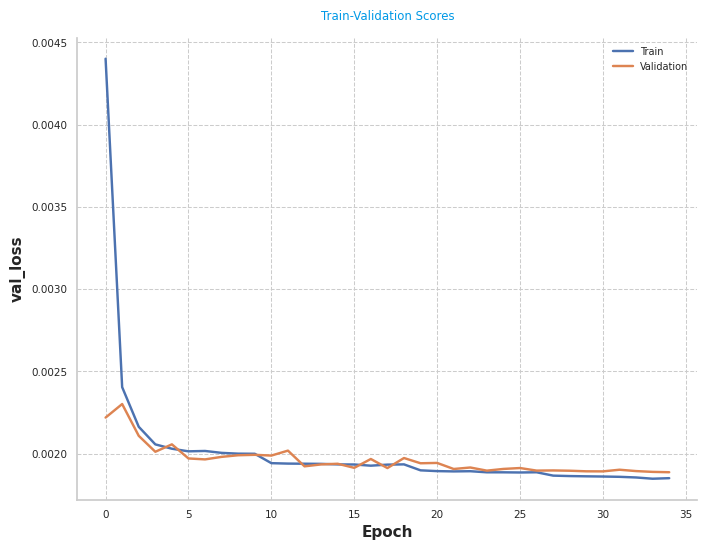

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step
Model spag_v0 - CV 0 R2 Score: 0.8594955275107954
Adapting Features Space for Model spag_v1
Start training the model: CV-0 and Model: spag_v1
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - R2_Score: 0.3753 - loss: 0.0083 - mse: 0.0083 - val_R2_Score: 0.8099 - val_loss: 0.0026 - val_mse: 0.0026 - learning_rate: 0.0050
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - R2_Score: 0.8173 - loss: 0.0025 - mse: 0.0025 - val_R2_Score: 0.8436 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0050
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - R2_Score: 0.8389 - loss: 0.0022 - mse: 0.0022 - val_R2_Score: 0.8381 - val_loss: 0.0022 - val_mse: 0.0022 - learning_rate: 0.0050
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - R2_Score: 0.8465 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8511 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0050
Epoch 5/35
1095/10

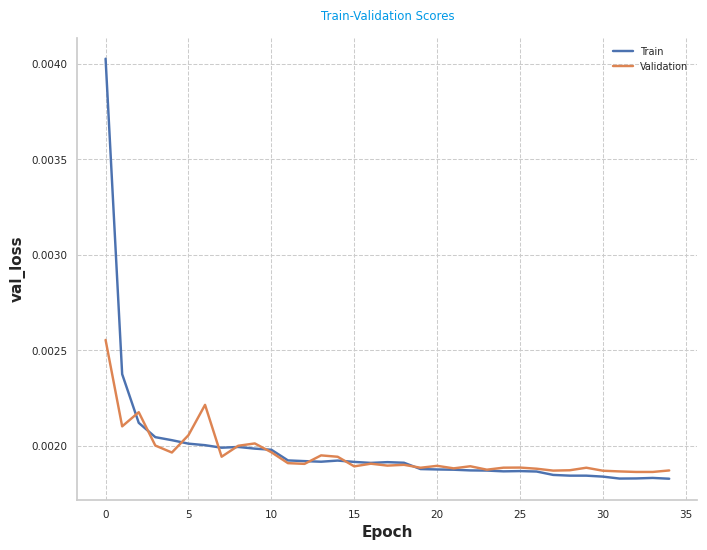

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step
Model spag_v1 - CV 0 R2 Score: 0.8614191138211866
Adapting Features Space for Model spag_v2
Start training the model: CV-0 and Model: spag_v2
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - R2_Score: 0.4714 - loss: 0.0072 - mse: 0.0072 - val_R2_Score: 0.8367 - val_loss: 0.0022 - val_mse: 0.0022 - learning_rate: 0.0050
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - R2_Score: 0.8249 - loss: 0.0024 - mse: 0.0024 - val_R2_Score: 0.8445 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0050
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - R2_Score: 0.8385 - loss: 0.0022 - mse: 0.0022 - val_R2_Score: 0.8442 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0050
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - R2_Score: 0.8452 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8392 - val_loss: 0.0022 - val_mse: 0.0022 - learning_rate: 0.0050
Epoch 5/35
1095/10

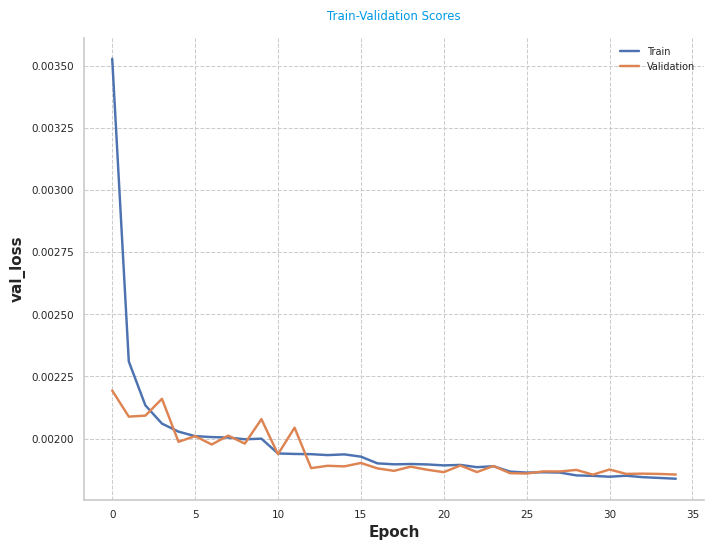

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step
Model spag_v2 - CV 0 R2 Score: 0.8619138369223531
Adapting Features Space for Model spag_v3
Start training the model: CV-0 and Model: spag_v3
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - R2_Score: 0.4668 - loss: 0.0071 - mse: 0.0071 - val_R2_Score: 0.8213 - val_loss: 0.0024 - val_mse: 0.0024 - learning_rate: 0.0050
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - R2_Score: 0.8244 - loss: 0.0024 - mse: 0.0024 - val_R2_Score: 0.8368 - val_loss: 0.0022 - val_mse: 0.0022 - learning_rate: 0.0050
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - R2_Score: 0.8383 - loss: 0.0022 - mse: 0.0022 - val_R2_Score: 0.8368 - val_loss: 0.0022 - val_mse: 0.0022 - learning_rate: 0.0050
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - R2_Score: 0.8439 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8508 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0050
Epoch 5/35
1095/10

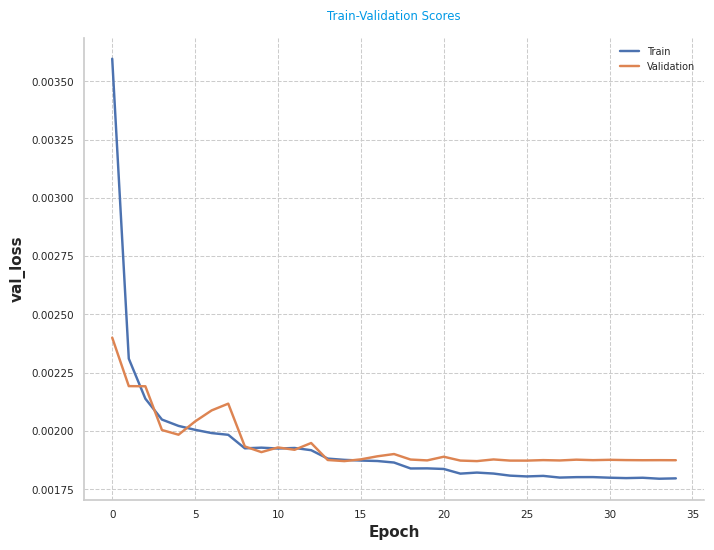

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step
Model spag_v3 - CV 0 R2 Score: 0.8607434235748228
Adapting Features Space for Model spag_v4
Start training the model: CV-0 and Model: spag_v4
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - R2_Score: 0.4012 - loss: 0.0080 - mse: 0.0080 - val_R2_Score: 0.8163 - val_loss: 0.0025 - val_mse: 0.0025 - learning_rate: 0.0050
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - R2_Score: 0.8190 - loss: 0.0024 - mse: 0.0024 - val_R2_Score: 0.8303 - val_loss: 0.0023 - val_mse: 0.0023 - learning_rate: 0.0050
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - R2_Score: 0.8363 - loss: 0.0022 - mse: 0.0022 - val_R2_Score: 0.8488 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0050
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - R2_Score: 0.8453 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8366 - val_loss: 0.0022 - val_mse: 0.0022 - learning_rate: 0.0050
Epoch 5/35
1095/10

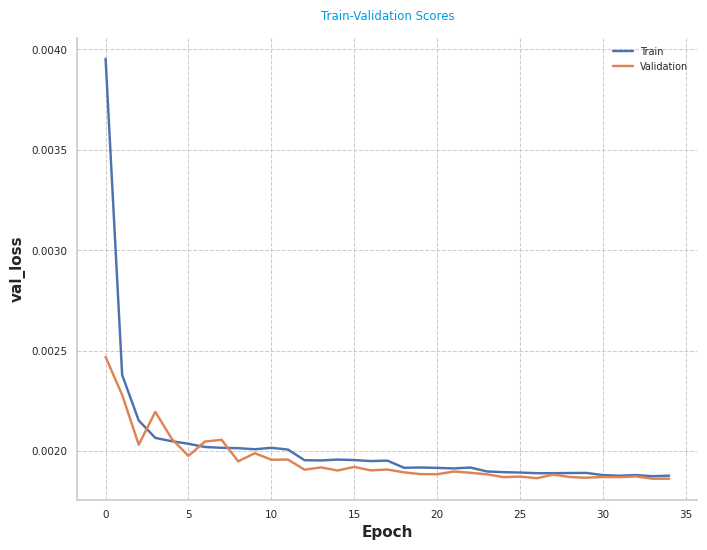

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step
Model spag_v4 - CV 0 R2 Score: 0.8613991100355882
Adapting Features Space for Model spag_v5
Start training the model: CV-0 and Model: spag_v5
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 88s 72ms/step - R2_Score: -0.6650 - loss: 0.0220 - mse: 0.0220 - val_R2_Score: 0.3868 - val_loss: 0.0082 - val_mse: 0.0082 - learning_rate: 0.0050
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 83s 73ms/step - R2_Score: 0.6813 - loss: 0.0043 - mse: 0.0043 - val_R2_Score: 0.7797 - val_loss: 0.0030 - val_mse: 0.0030 - learning_rate: 0.0050
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 83s 74ms/step - R2_Score: 0.7566 - loss: 0.0033 - mse: 0.0033 - val_R2_Score: 0.8305 - val_loss: 0.0023 - val_mse: 0.0023 - learning_rate: 0.0050
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - R2_Score: 0.7692 - loss: 0.0031 - mse: 0.0031 - val_R2_Score: 0.8167 - val_loss: 0.0025 - val_mse: 0.0025 - learning_rate: 0.0050
Epoch 5/35
1095/1

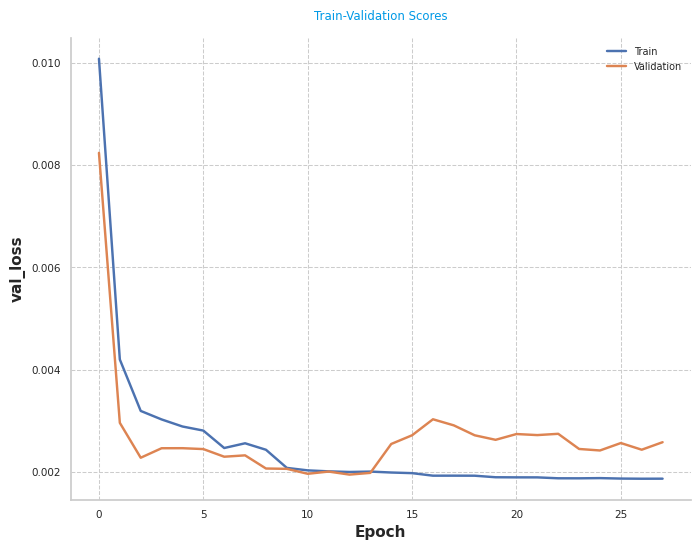

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 100s 17ms/step
Model spag_v5 - CV 0 R2 Score: 0.8550385454462437
Adapting Features Space for Model hashed_v0
Start training the model: CV-0 and Model: hashed_v0
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - R2_Score: 0.4712 - loss: 0.0071 - mse: 0.0071 - val_R2_Score: 0.8283 - val_loss: 0.0023 - val_mse: 0.0023 - learning_rate: 0.0025
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - R2_Score: 0.8257 - loss: 0.0023 - mse: 0.0023 - val_R2_Score: 0.8438 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0025
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - R2_Score: 0.8327 - loss: 0.0023 - mse: 0.0023 - val_R2_Score: 0.8420 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0025
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - R2_Score: 0.8401 - loss: 0.0022 - mse: 0.0022 - val_R2_Score: 0.8429 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0025
Epoch 5/35


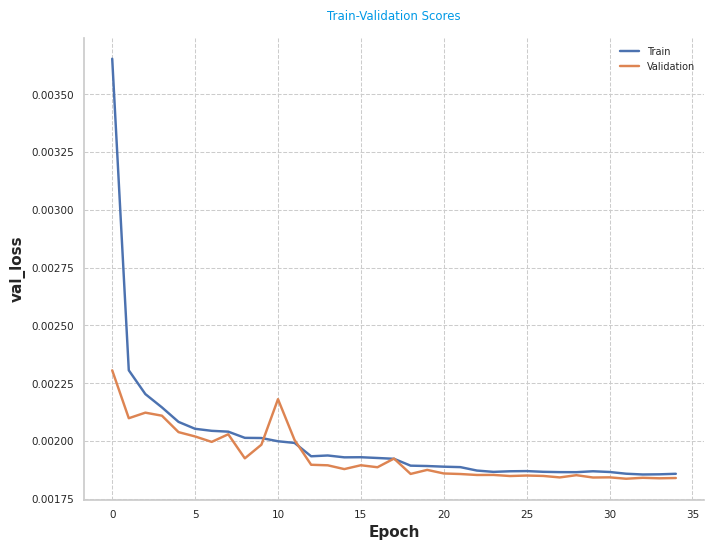

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step
Model hashed_v0 - CV 0 R2 Score: 0.8632347239176511
Adapting Features Space for Model hashed_v1
Start training the model: CV-0 and Model: hashed_v1
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 76s 62ms/step - R2_Score: -0.0641 - loss: 0.0141 - mse: 0.0141 - val_R2_Score: 0.7870 - val_loss: 0.0029 - val_mse: 0.0029 - learning_rate: 0.0025
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 68s 60ms/step - R2_Score: 0.7212 - loss: 0.0037 - mse: 0.0037 - val_R2_Score: 0.6038 - val_loss: 0.0053 - val_mse: 0.0053 - learning_rate: 0.0025
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 68s 59ms/step - R2_Score: 0.7158 - loss: 0.0038 - mse: 0.0038 - val_R2_Score: 0.7725 - val_loss: 0.0031 - val_mse: 0.0031 - learning_rate: 0.0025
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 68s 60ms/step - R2_Score: 0.7985 - loss: 0.0027 - mse: 0.0027 - val_R2_Score: 0.8314 - val_loss: 0.0023 - val_mse: 0.0023 - learning_rate: 0.0025
Epoch 5/35


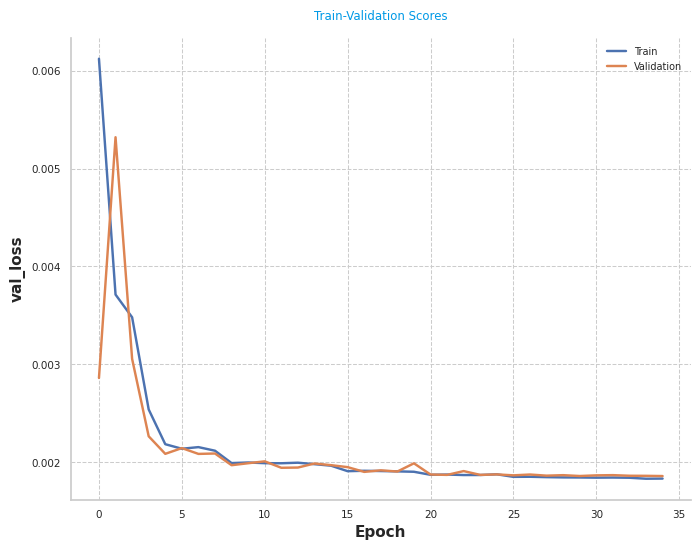

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 75s 13ms/step
Model hashed_v1 - CV 0 R2 Score: 0.8616421700064322
Adapting Features Space for Model baseline_v0
Start training the model: CV-0 and Model: baseline_v0
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 146s 84ms/step - R2_Score: 0.5488 - loss: 0.0061 - mse: 0.0061 - val_R2_Score: 0.8390 - val_loss: 0.0022 - val_mse: 0.0022 - learning_rate: 0.0025
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 105s 94ms/step - R2_Score: 0.8445 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8463 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0025
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 92s 82ms/step - R2_Score: 0.8454 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8497 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0025
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 94s 84ms/step - R2_Score: 0.8468 - loss: 0.0020 - mse: 0.0020 - val_R2_Score: 0.8483 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0025
Epoc

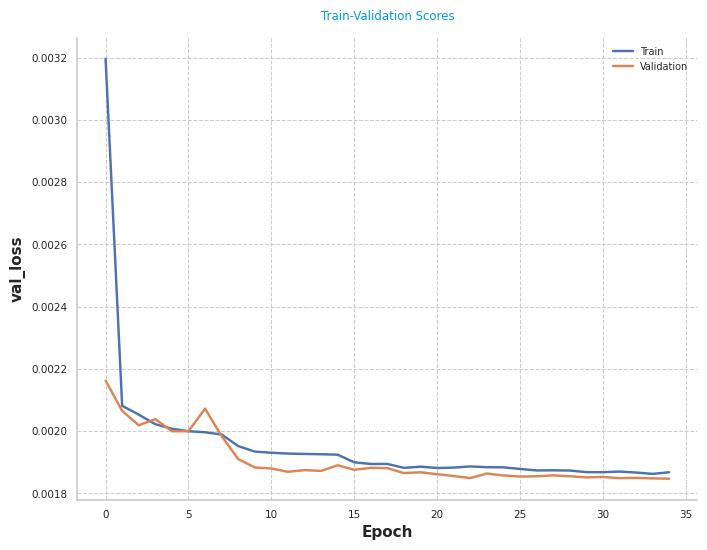

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 130s 22ms/step
Model baseline_v0 - CV 0 R2 Score: 0.862516845291653
Adapting Features Space for Model baseline_v1
Start training the model: CV-0 and Model: baseline_v1
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 127s 75ms/step - R2_Score: 0.5490 - loss: 0.0060 - mse: 0.0060 - val_R2_Score: 0.8440 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0025
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - R2_Score: 0.8465 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8485 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0025
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 80s 71ms/step - R2_Score: 0.8477 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8459 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0025
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 80s 71ms/step - R2_Score: 0.8485 - loss: 0.0020 - mse: 0.0020 - val_R2_Score: 0.8489 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0025
Epo

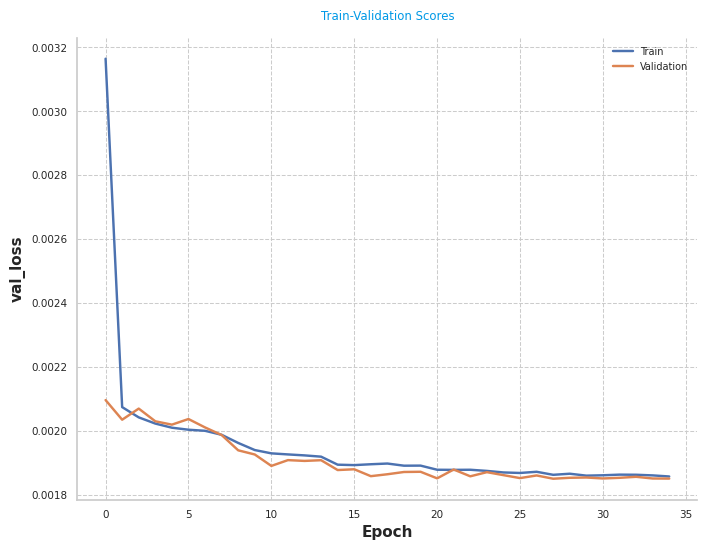

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 125s 21ms/step
Model baseline_v1 - CV 0 R2 Score: 0.8622739949691021
Adapting Features Space for Model baseline_v2
Start training the model: CV-0 and Model: baseline_v2
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 158s 105ms/step - R2_Score: 0.4641 - loss: 0.0072 - mse: 0.0072 - val_R2_Score: 0.8496 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0025
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 115s 103ms/step - R2_Score: 0.8440 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8470 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0025
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 114s 103ms/step - R2_Score: 0.8481 - loss: 0.0020 - mse: 0.0020 - val_R2_Score: 0.8478 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0025
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 117s 105ms/step - R2_Score: 0.8490 - loss: 0.0020 - mse: 0.0020 - val_R2_Score: 0.8529 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.

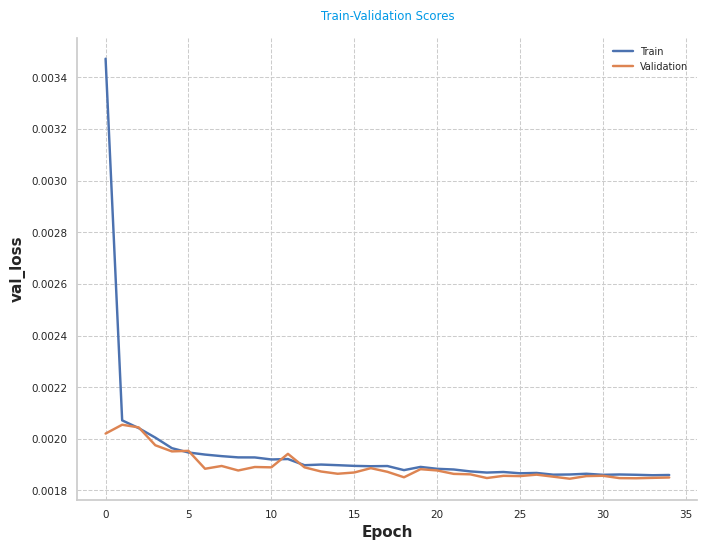

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 165s 28ms/step
Model baseline_v2 - CV 0 R2 Score: 0.8625980999191548

Running CV 1

/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/S4E4_Abalone already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/baseline_nn/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/baseline_nn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E4_Abalone/neural_networks/baseline_nn/cv_1/ already exists
Adapting Features Space for Model spag_v0
Start training the model: CV-1 and Model: spag_v0
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - R2_Score: 0.4355 - loss: 0.0076 - mse: 0.0076 - val_R2_Score: 0.8175 - val_loss: 0.0024 - val_mse: 0.0024 - learning_rate: 

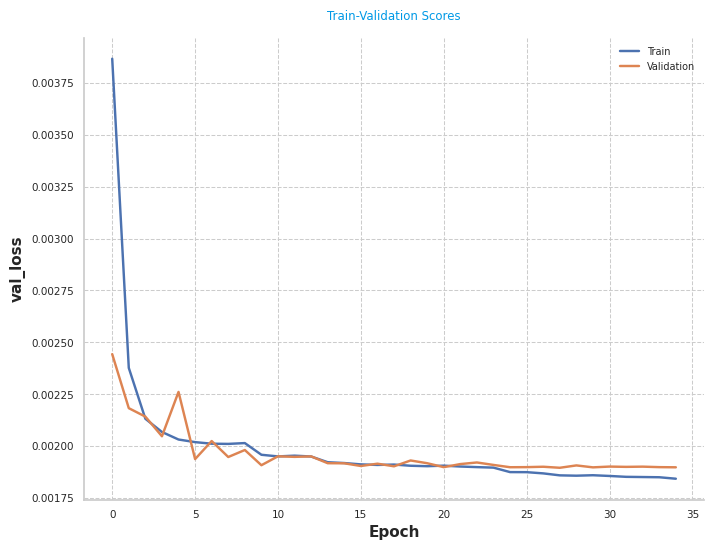

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step
Model spag_v0 - CV 1 R2 Score: 0.8584022177160172
Adapting Features Space for Model spag_v1
Start training the model: CV-1 and Model: spag_v1
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - R2_Score: 0.2280 - loss: 0.0103 - mse: 0.0103 - val_R2_Score: 0.8228 - val_loss: 0.0024 - val_mse: 0.0024 - learning_rate: 0.0050
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - R2_Score: 0.8136 - loss: 0.0025 - mse: 0.0025 - val_R2_Score: 0.8219 - val_loss: 0.0024 - val_mse: 0.0024 - learning_rate: 0.0050
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - R2_Score: 0.8358 - loss: 0.0022 - mse: 0.0022 - val_R2_Score: 0.8475 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0050
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step - R2_Score: 0.8442 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8468 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0050
Epoch 5/35
1095/10

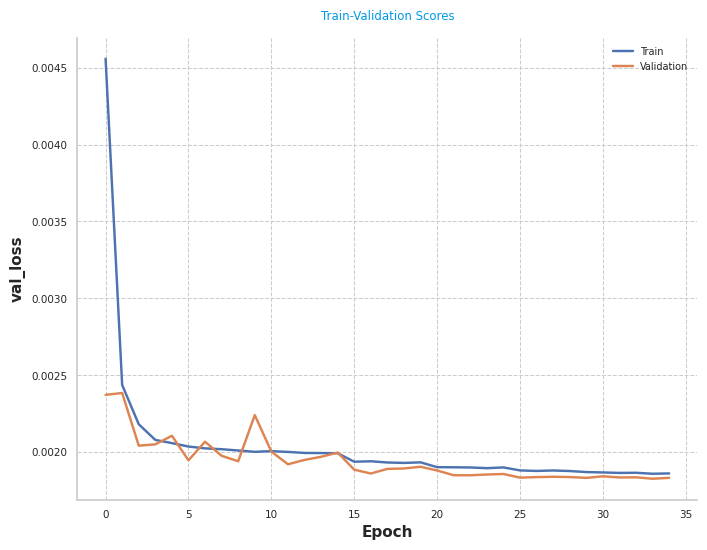

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step
Model spag_v1 - CV 1 R2 Score: 0.8635456849616101
Adapting Features Space for Model spag_v2
Start training the model: CV-1 and Model: spag_v2
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - R2_Score: 0.5428 - loss: 0.0061 - mse: 0.0061 - val_R2_Score: 0.8128 - val_loss: 0.0025 - val_mse: 0.0025 - learning_rate: 0.0050
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - R2_Score: 0.8240 - loss: 0.0023 - mse: 0.0023 - val_R2_Score: 0.8421 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0050
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - R2_Score: 0.8379 - loss: 0.0022 - mse: 0.0022 - val_R2_Score: 0.8409 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0050
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - R2_Score: 0.8463 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8517 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0050
Epoch 5/35
1095/10

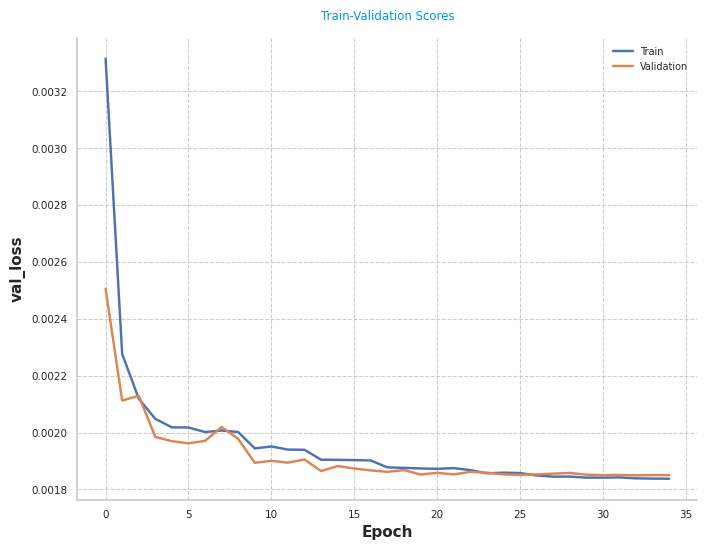

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step
Model spag_v2 - CV 1 R2 Score: 0.8617969452581902
Adapting Features Space for Model spag_v3
Start training the model: CV-1 and Model: spag_v3
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - R2_Score: 0.4639 - loss: 0.0072 - mse: 0.0072 - val_R2_Score: 0.7590 - val_loss: 0.0032 - val_mse: 0.0032 - learning_rate: 0.0050
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - R2_Score: 0.8278 - loss: 0.0023 - mse: 0.0023 - val_R2_Score: 0.8459 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0050
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - R2_Score: 0.8379 - loss: 0.0022 - mse: 0.0022 - val_R2_Score: 0.8459 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0050
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - R2_Score: 0.8445 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8440 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0050
Epoch 5/35
1095/10

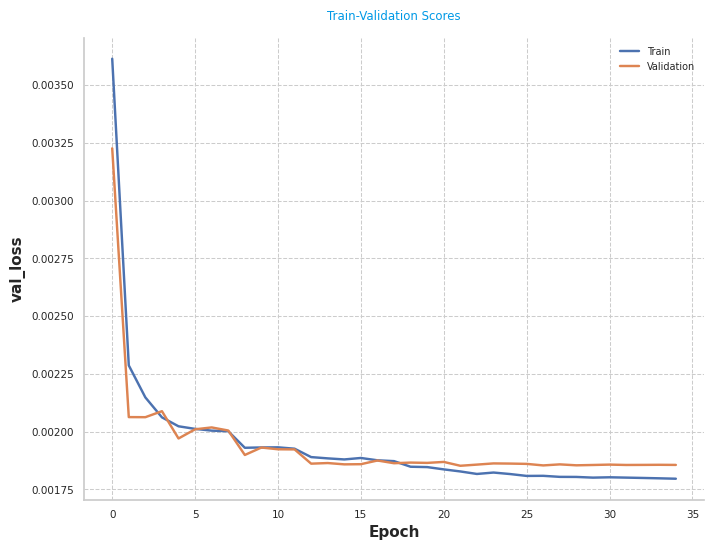

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step
Model spag_v3 - CV 1 R2 Score: 0.8616575077930151
Adapting Features Space for Model spag_v4
Start training the model: CV-1 and Model: spag_v4
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - R2_Score: 0.3501 - loss: 0.0089 - mse: 0.0089 - val_R2_Score: 0.7982 - val_loss: 0.0027 - val_mse: 0.0027 - learning_rate: 0.0050
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - R2_Score: 0.8098 - loss: 0.0025 - mse: 0.0025 - val_R2_Score: 0.8317 - val_loss: 0.0023 - val_mse: 0.0023 - learning_rate: 0.0050
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - R2_Score: 0.8358 - loss: 0.0022 - mse: 0.0022 - val_R2_Score: 0.8478 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0050
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - R2_Score: 0.8463 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8487 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0050
Epoch 5/35
1095/10

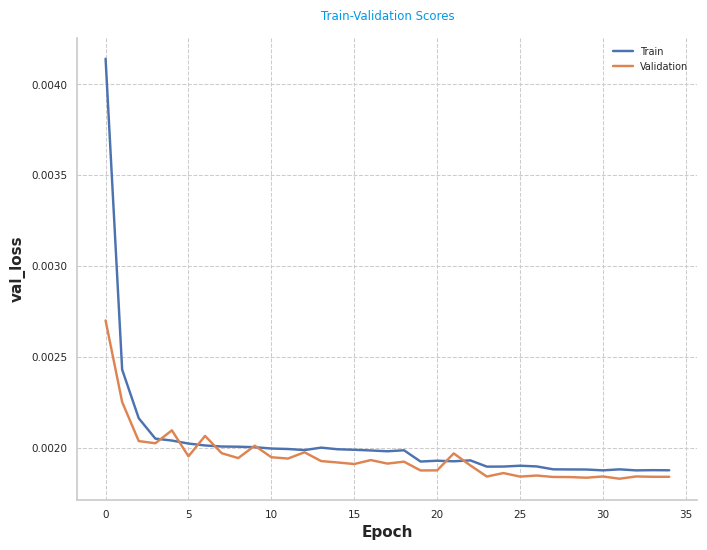

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step
Model spag_v4 - CV 1 R2 Score: 0.8632399502865343
Adapting Features Space for Model spag_v5
Start training the model: CV-1 and Model: spag_v5
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 88s 72ms/step - R2_Score: -0.6453 - loss: 0.0222 - mse: 0.0222 - val_R2_Score: 0.7160 - val_loss: 0.0038 - val_mse: 0.0038 - learning_rate: 0.0050
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 83s 74ms/step - R2_Score: 0.6750 - loss: 0.0044 - mse: 0.0044 - val_R2_Score: 0.7475 - val_loss: 0.0034 - val_mse: 0.0034 - learning_rate: 0.0050
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 83s 74ms/step - R2_Score: 0.7471 - loss: 0.0034 - mse: 0.0034 - val_R2_Score: 0.7848 - val_loss: 0.0029 - val_mse: 0.0029 - learning_rate: 0.0050
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - R2_Score: 0.7687 - loss: 0.0031 - mse: 0.0031 - val_R2_Score: 0.7088 - val_loss: 0.0039 - val_mse: 0.0039 - learning_rate: 0.0050
Epoch 5/35
1095/1

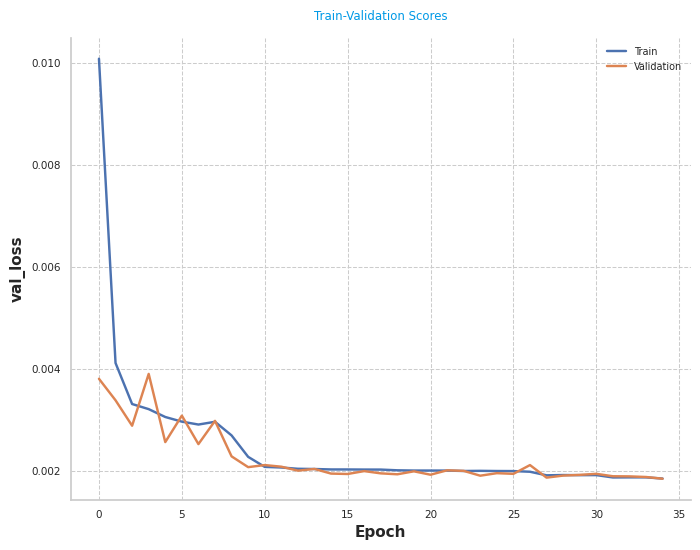

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 90s 15ms/step
Model spag_v5 - CV 1 R2 Score: 0.8625055579282039
Adapting Features Space for Model hashed_v0
Start training the model: CV-1 and Model: hashed_v0
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - R2_Score: 0.4845 - loss: 0.0068 - mse: 0.0068 - val_R2_Score: 0.8328 - val_loss: 0.0022 - val_mse: 0.0022 - learning_rate: 0.0025
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - R2_Score: 0.8258 - loss: 0.0024 - mse: 0.0024 - val_R2_Score: 0.8359 - val_loss: 0.0022 - val_mse: 0.0022 - learning_rate: 0.0025
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - R2_Score: 0.8341 - loss: 0.0022 - mse: 0.0022 - val_R2_Score: 0.8432 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0025
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - R2_Score: 0.8405 - loss: 0.0022 - mse: 0.0022 - val_R2_Score: 0.8474 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0025
Epoch 5/35
1

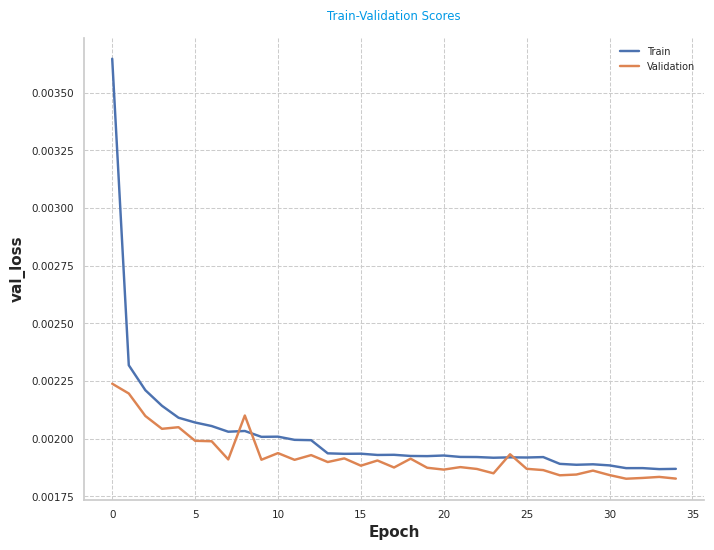

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step
Model hashed_v0 - CV 1 R2 Score: 0.8635197154189664
Adapting Features Space for Model hashed_v1
Start training the model: CV-1 and Model: hashed_v1
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 70s 54ms/step - R2_Score: -0.0577 - loss: 0.0142 - mse: 0.0142 - val_R2_Score: 0.7937 - val_loss: 0.0028 - val_mse: 0.0028 - learning_rate: 0.0025
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 61s 52ms/step - R2_Score: 0.7378 - loss: 0.0035 - mse: 0.0035 - val_R2_Score: 0.8042 - val_loss: 0.0026 - val_mse: 0.0026 - learning_rate: 0.0025
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 59s 50ms/step - R2_Score: 0.7521 - loss: 0.0033 - mse: 0.0033 - val_R2_Score: 0.8007 - val_loss: 0.0027 - val_mse: 0.0027 - learning_rate: 0.0025
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 59s 51ms/step - R2_Score: 0.8110 - loss: 0.0025 - mse: 0.0025 - val_R2_Score: 0.8373 - val_loss: 0.0022 - val_mse: 0.0022 - learning_rate: 0.0025
Epoch 5/35


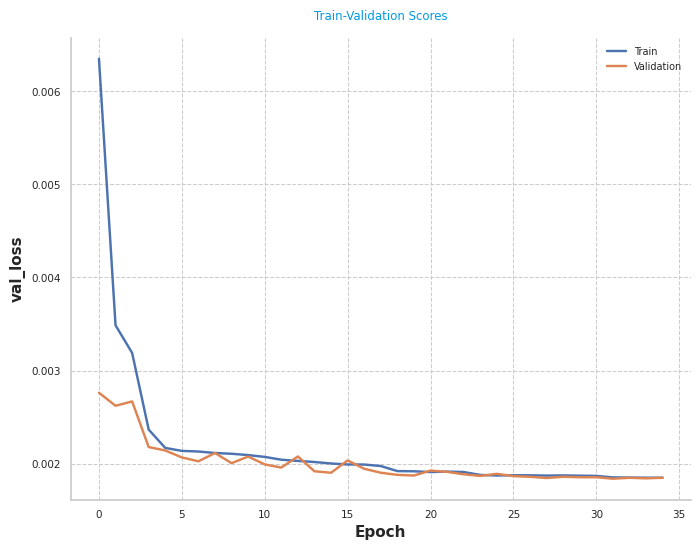

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 69s 12ms/step
Model hashed_v1 - CV 1 R2 Score: 0.8627252922191787
Adapting Features Space for Model baseline_v0
Start training the model: CV-1 and Model: baseline_v0
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 128s 76ms/step - R2_Score: 0.5645 - loss: 0.0058 - mse: 0.0058 - val_R2_Score: 0.8501 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0025
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - R2_Score: 0.8470 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8460 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0025
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - R2_Score: 0.8483 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8445 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0025
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 83s 74ms/step - R2_Score: 0.8479 - loss: 0.0020 - mse: 0.0020 - val_R2_Score: 0.8484 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0025
Epoch

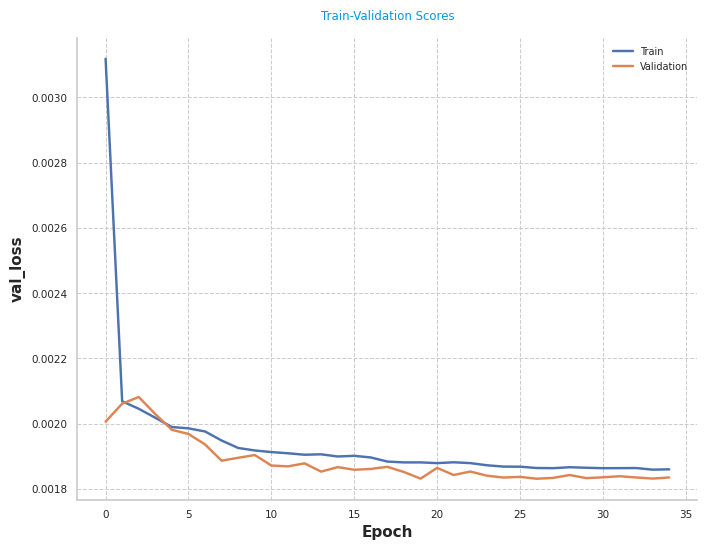

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 144s 24ms/step
Model baseline_v0 - CV 1 R2 Score: 0.8631834905011391
Adapting Features Space for Model baseline_v1
Start training the model: CV-1 and Model: baseline_v1
Epoch 1/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 140s 82ms/step - R2_Score: 0.5663 - loss: 0.0058 - mse: 0.0058 - val_R2_Score: 0.8464 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0025
Epoch 2/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 90s 80ms/step - R2_Score: 0.8456 - loss: 0.0021 - mse: 0.0021 - val_R2_Score: 0.8421 - val_loss: 0.0021 - val_mse: 0.0021 - learning_rate: 0.0025
Epoch 3/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 87s 77ms/step - R2_Score: 0.8488 - loss: 0.0020 - mse: 0.0020 - val_R2_Score: 0.8474 - val_loss: 0.0020 - val_mse: 0.0020 - learning_rate: 0.0025
Epoch 4/35
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 87s 77ms/step - R2_Score: 0.8496 - loss: 0.0020 - mse: 0.0020 - val_R2_Score: 0.8551 - val_loss: 0.0019 - val_mse: 0.0019 - learning_rate: 0.0025
Ep

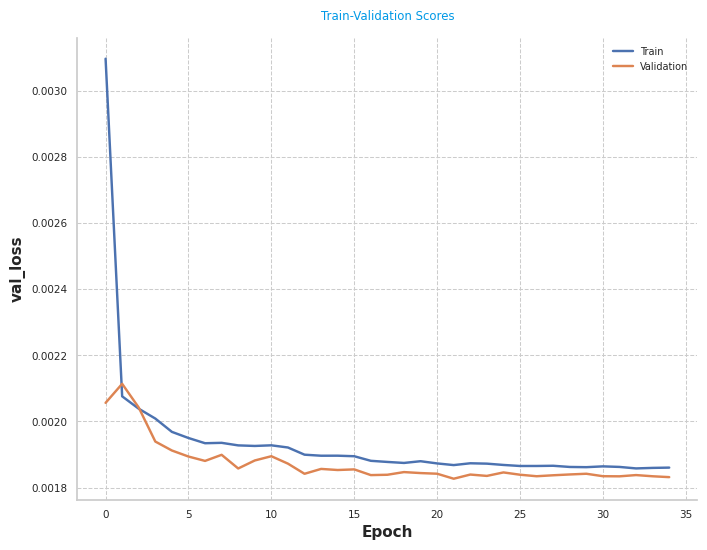

1825/1825 ━━━━━━━━━━━━━━━━━━━━ 49s 24ms/step
5823/5823 ━━━━━━━━━━━━━━━━━━━━ 127s 21ms/step
Model baseline_v1 - CV 1 R2 Score: 0.863519268169624
Adapting Features Space for Model baseline_v2


In [ ]:
test_results_df, oof_results = run_experiment(list_nn_models, X_train_df, X_test_df, experiment_name="baseline_nn", splits=5, rs=42, target="FloodProbability",
                                              batch_size=128,num_epochs=35, learning_rate=0.0025)

## 7.0 Store and Evaluate Results:

In [ ]:
for k in y_pred_test_final_dict.keys():
  print(k)

In [ ]:
for k in y_pred_test_final_dict.keys():
  print(f"OOF Shape {k}: {oof[k].shape}")
  print(f"{k} Nan: {np.isnan(y_pred_test_final_dict[k]).sum()}")
  print(f"{k} Min: {y_pred_test_final_dict[k].min()}")

members = [name for name in oof.keys() if 'Stack' not in name]
X = np.column_stack([oof[name] for name in members])

In [ ]:
sub_res_final={}
for k in y_pred_test_final_dict.keys():
  print(f"OOF Shape {k}: {oof[k].shape}")
  print(f"Test {k} Nan: {np.isnan(y_pred_test_final_dict[k]).sum()}")
  sub_res_final[k] = create_sub_files(df_results=y_pred_test_final_dict[k], scaler=y_scaler, oof_results=oof[k], experiment_name = f"{k}", folder_data = f"/content/drive/MyDrive/Exercises/Studies_Structured_Data//Data/S4E5_Flood")

In [ ]:
target_groups = train_df.copy()
plt.figure(figsize=(10, 6))
sns.histplot(data=sub_res_final["LGBM_v1"], x='FloodProbability', kde=True,
             stat="percent"
              )
plt.title('Distribution of FloodProbability', fontsize=15)
plt.xlabel('FloodProbability')
plt.ylabel('Frequency')
plt.grid(True)
#plt.yscale('log')
plt.show()

In [ ]:
plt.scatter(y_pred_test_final_dict["LGBM_v1"], y_pred_test_final_dict["Stack_ridge_v1"])

##### * **RIDGE V1**

In [ ]:
members = [name for name in oof.keys() if 'Stack' not in name]

X = np.column_stack([oof[name] for name in members])
model_r1 = Ridge(positive=True,alpha=1)

model_r1.fit(X, X_train_df.FloodProbability)
print('Ensemble weights')
weights = pd.Series(model_r1.coef_, index=members)
print(weights)
print('Total weight:', weights.sum())
print('Intercept:', model_r1.intercept_)
oof['Stack_ridge'] = model_r1.predict(X) # not really out-of-fold...
print(f"Score: {r2_score(X_train_df.FloodProbability, oof['Stack_ridge']):.5f}")

# Pie chart
weights = weights[weights > 0]
plt.pie(weights, labels=weights.index, autopct="%.0f%%")
plt.title('Ensemble weights')
plt.show()

# Test predictions
if COMPUTE_TEST_PRED:
    X = np.column_stack([y_pred_test_final_dict[name] for name in members])
    y_pred_test_final_dict['Stack_ridge_v1'] = model_r1.predict(X)

del weights
gc.collect()

In [ ]:
y_pred_test_final_dict.keys()